# Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by [Codecademy.com](https://www.codecademy.com).

## Scoping 

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

### Project goals

The primary objective of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. The specific research question that will be addressed is whether it's possible to predict an OkCupid user's religion using other variables from their profile. This project is significant since religion is an important factor for many users when selecting potential matches. Furthermore, if users don't input their religion, OkCupid would like to predict it.

### Data

The project will use one dataset provided by Codecademy called profiles.csv. The data comprises user profiles, with each row representing an OkCupid user and the columns consisting of their responses to multi-choice and short answer questions.

### Analysis

To understand the distribution, count, and relationship between variables, descriptive statistics and data visualization will be used. Since the project's primary goal is to make predictions about users' astrological signs, supervised learning machine learning models' classification algorithms will be used.


### Evaluation

At the conclusion of the project, the machine learning model will be evaluated using a validation dataset. A confusion matrix and metrics such as accuracy, precision, recall, and F1 scores can be used to verify the predictions' output.

## Load and Check Data

Before proceeding with supervised learning, it is important to verify that the data has a label or response variable. Without a label or response variable, the data cannot be used for supervised learning, and an alternative approach may need to be considered. If the data is missing a crucial piece for analysis, it may be necessary to go back to the previous step and select a different problem to solve that has complete and relevant data.

### Import Python Modules

First import the modules being used for this project:

In [2]:
# import general libraries
import pandas as pd
import numpy as np
from IPython.display import display
pd.set_option('display.max_columns', None)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading the Data

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a DataFrame so that it can be explored and visualized with Python.

Here `profiles.csv` is loaded into a `DataFrame` called `profiles`. The `DataFrame` is then briefly examined using `.head()` to check the contents.

In [3]:
# load the dataset
profiles = pd.read_csv('profiles.csv')
profiles

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term co

The dataset provided has the following columns of multiple-choice data:

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

In [4]:
# display columns
print(profiles.columns)

# display shape of data
print(profiles.shape)

# display info of data
print(profiles.info())

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
(59946, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  objec

**Identify missing data, outliers, and duplicates: Use the `isnull function` to identify missing values in the dataset. Use the `value_counts` function to identify duplicates in the dataset. Use `box plots and histograms` to identify outliers in the dataset.**

## See duplicates in data

In [5]:
# print number duplicates in data
duplicates = profiles.duplicated()
print("__________________________")
print(duplicates.value_counts())

# print decribe data
print("__________________________")
print(profiles.describe(include='all'))

__________________________
False    59946
dtype: int64
__________________________
                 age body_type             diet    drinks  drugs  \
count   59946.000000     54650            35551     56961  45866   
unique           NaN        12               18         6      3   
top              NaN   average  mostly anything  socially  never   
freq             NaN     14652            16585     41780  37724   
mean       32.340290       NaN              NaN       NaN    NaN   
std         9.452779       NaN              NaN       NaN    NaN   
min        18.000000       NaN              NaN       NaN    NaN   
25%        26.000000       NaN              NaN       NaN    NaN   
50%        30.000000       NaN              NaN       NaN    NaN   
75%        37.000000       NaN              NaN       NaN    NaN   
max       110.000000       NaN              NaN       NaN    NaN   

                                education essay0        essay1     essay2  \
count                   

### Age

In [6]:
# Calculate the IQR
q1 = profiles.age.quantile(0.25)
q3 = profiles.age.quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

profiles_age = profiles[(profiles.age >= lower_fence) & (profiles.age <= upper_fence)].reset_index(drop=True)

count    57308.000000
mean        31.093774
std          7.571302
min         18.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         53.000000
Name: age, dtype: float64
[110, 109, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18]


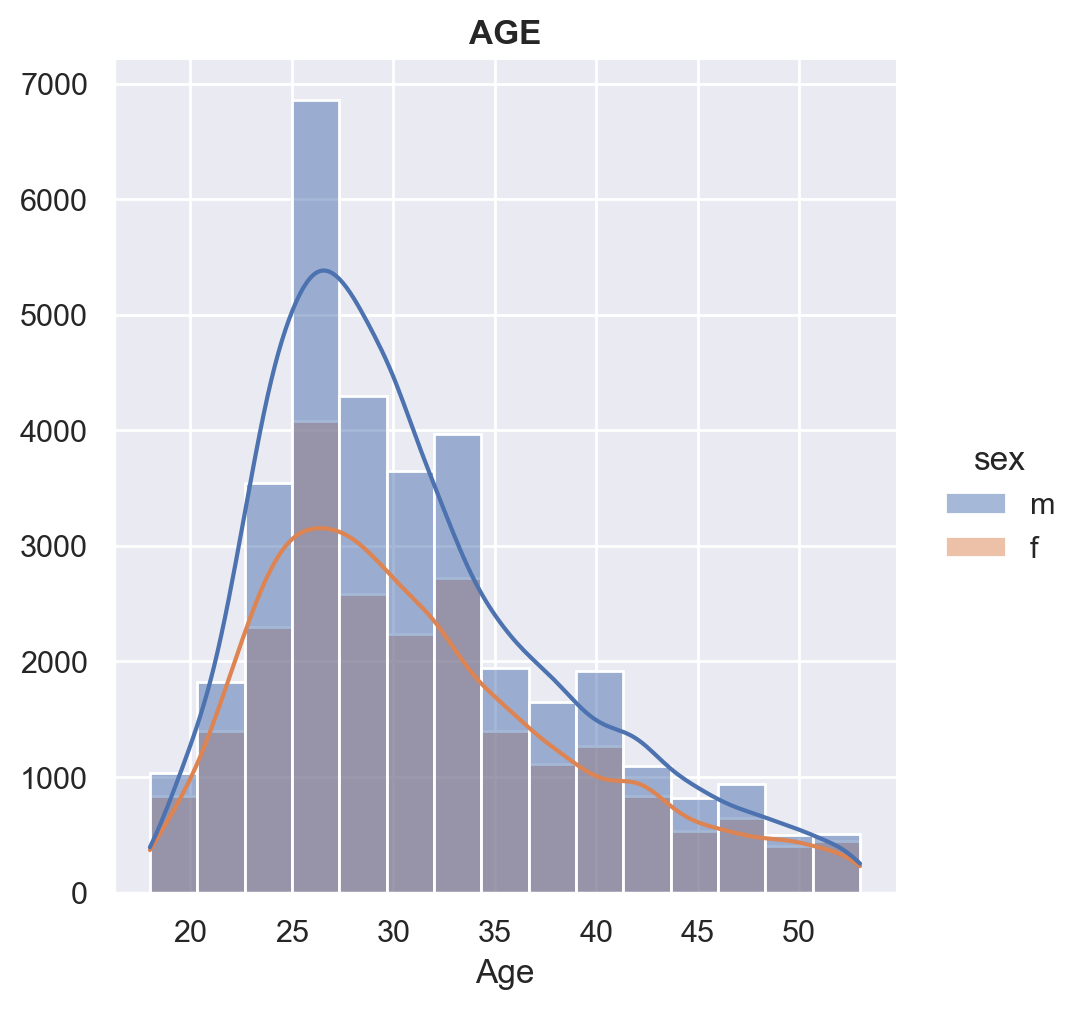

In [7]:
# describe the column
print(profiles_age.age.describe())

# print unique age
print(sorted(profiles.age.unique(), reverse=True))

# hist plot age
sns.displot(x='age', data=profiles_age, bins=15, kde=True, hue='sex')
plt.title("AGE", fontweight='bold')
plt.xlabel("Age")
plt.ylabel("")
plt.savefig("age.png", dpi=1000)
plt.show()

The age column in the dataset has an average age of 31.09 years and a standard deviation of 7.57 years. The minimum age in the dataset is 18 years, and the maximum age is 69 years. The ages in the dataset range from 18 to 69 years, with most people falling in the age range of 25 to 35 years.

### Body type

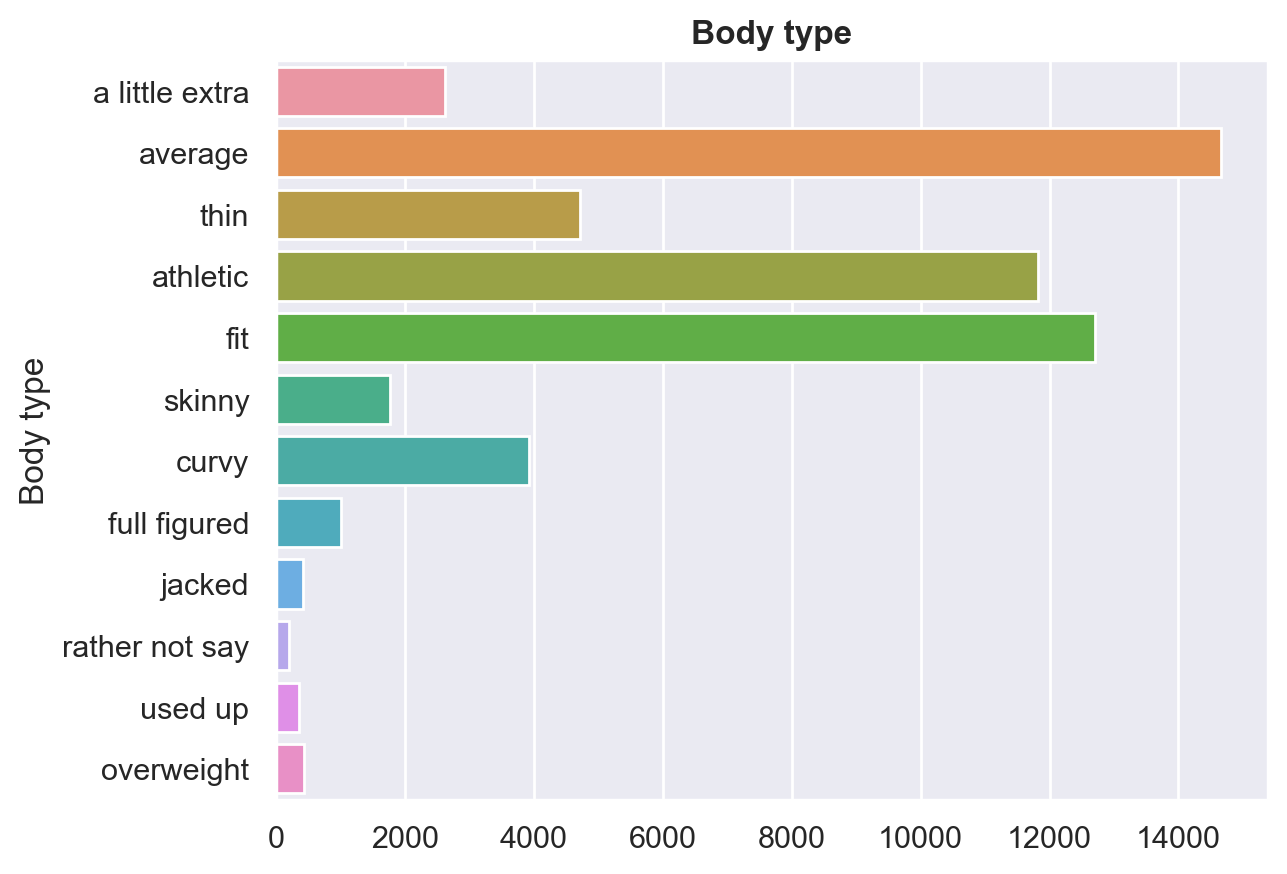

In [8]:
# bar plot
sns.countplot(y=profiles['body_type'])
plt.title("Body type", fontweight='bold')
plt.ylabel("Body type")
plt.xlabel("")
plt.show()

The most common body type among users is "average", followed by "athletic" and "fit", which have a significant number of mentions as well. On the other hand, the categories "used up", "overweight", and "jacked" have the lowest counts among users.

## Diet

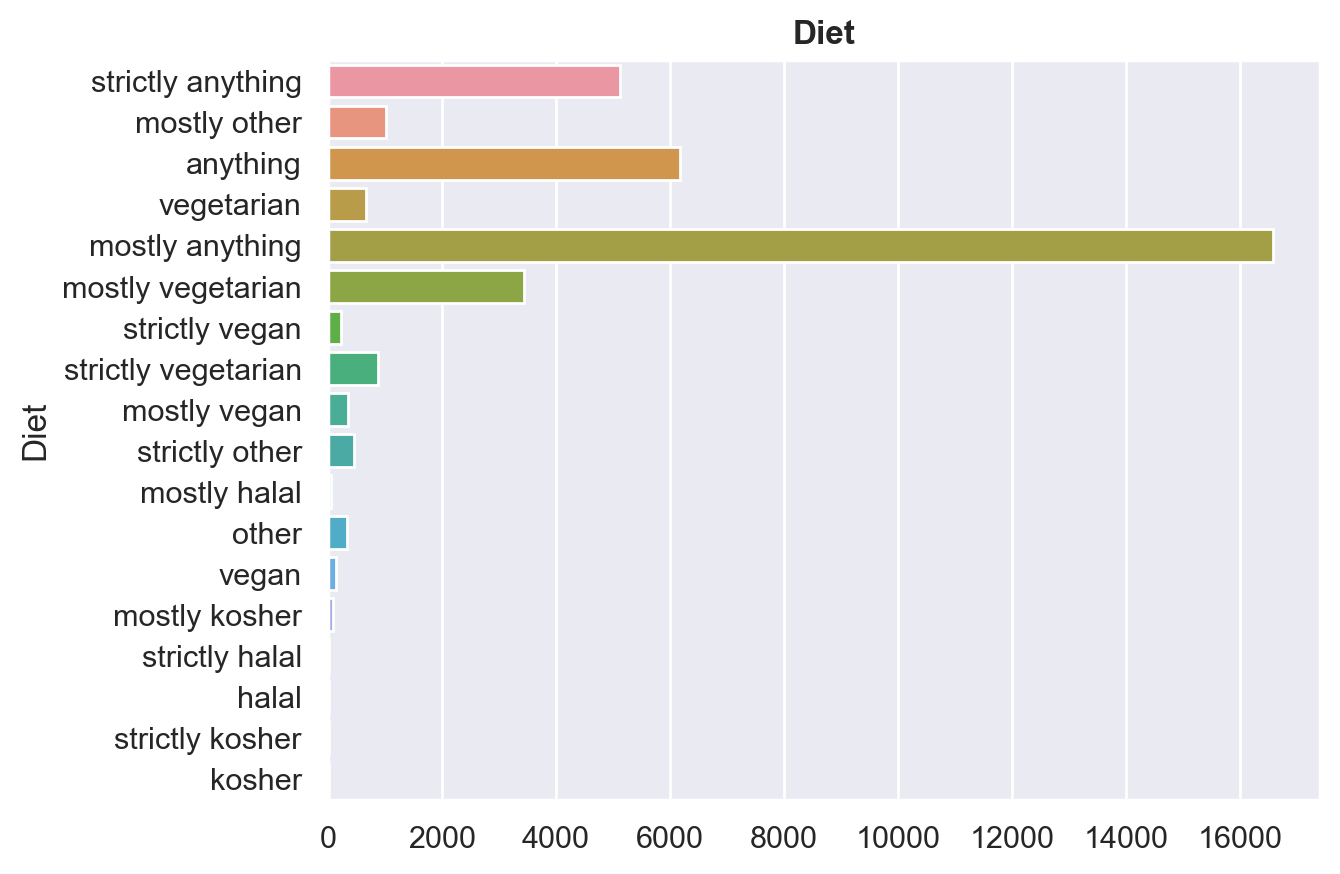

In [9]:
# bar plot
sns.countplot(y='diet', data=profiles)
plt.title("Diet", fontweight='bold')
plt.xlabel("")
plt.ylabel("Diet")
plt.show()

The diet information provided in the dataset reveals that the majority of users identify as eating "mostly anything". Other common responses include "anything" and "strictly anything". It's worth noting that a significant portion of users didn't provide information about their diet. Among those who did, the least common categories were "kosher", "vegan", and "halal".

### Drinks

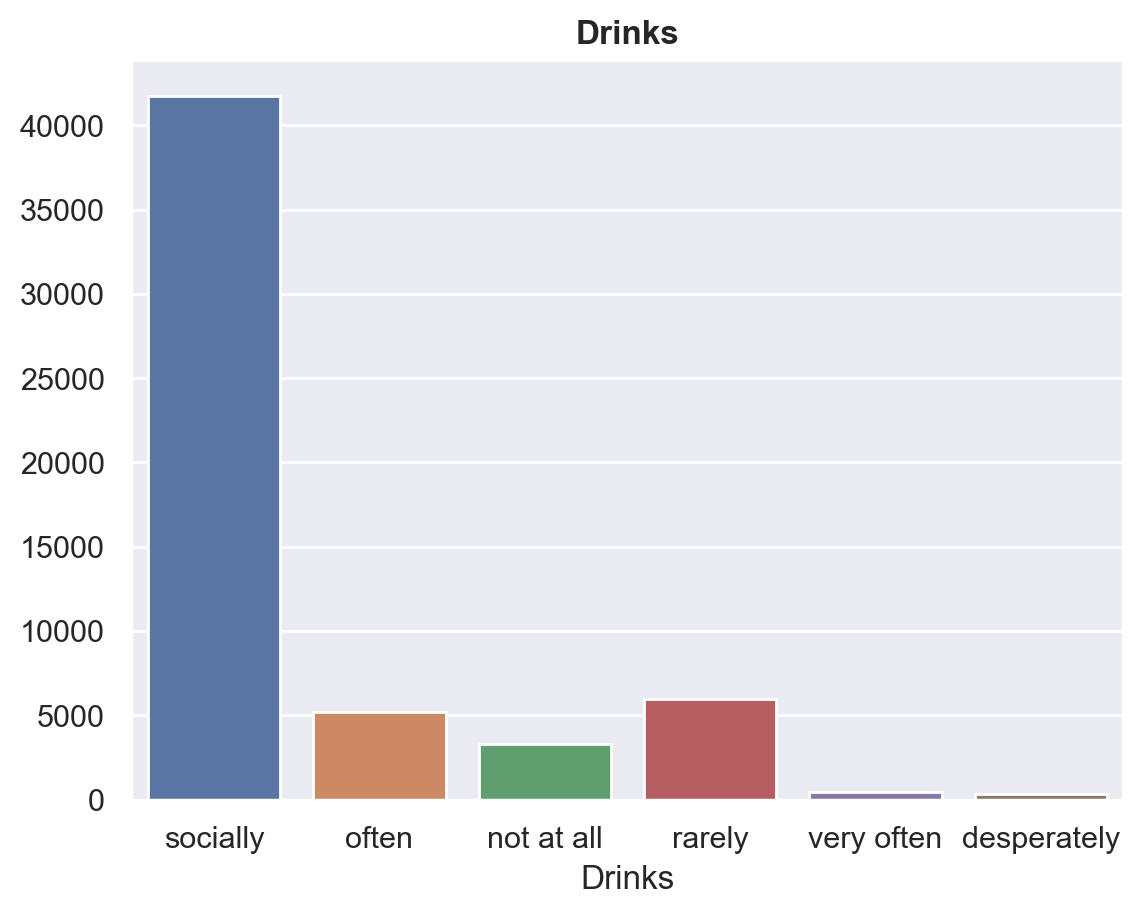

In [10]:
# bar plot
sns.countplot(x='drinks', data=profiles)
plt.title("Drinks", fontweight='bold')
plt.xlabel("Drinks")
plt.ylabel("")
plt.show()

The drinks information in the dataset reveals that most users describe their drinking habits as 'socially'. This is followed by 'rarely' and 'often', while 'not at all' is also a fairly common response. Overall, the data suggests that a significant portion of users on the platform consume alcohol occasionally or socially.

### Drugs

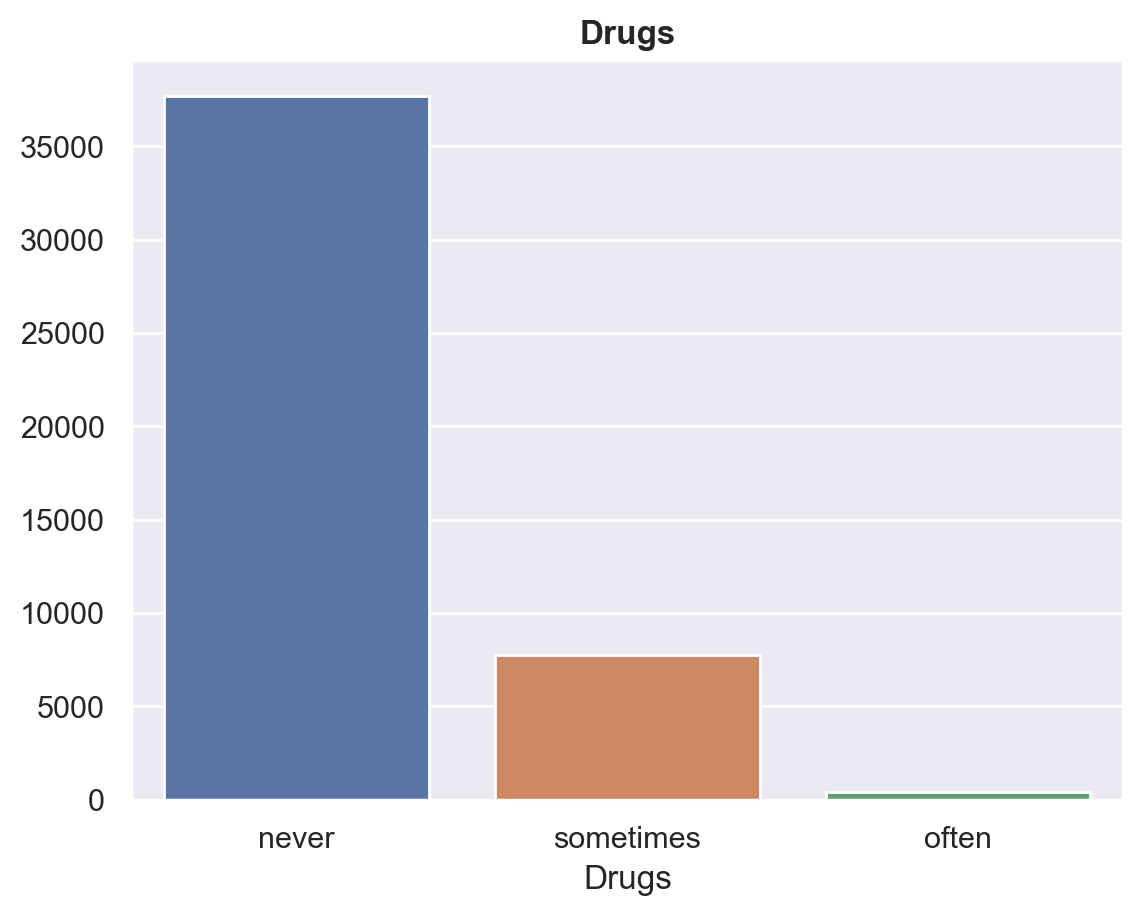

In [11]:
# bar plot
sns.countplot(x='drugs', data=profiles)
plt.title("Drugs", fontweight='bold')
plt.xlabel("Drugs")
plt.ylabel("")
plt.show()

The majority of users (over 77%) stated that they never use drugs, while only a small fraction (less than 1%) claimed to use drugs often. Some users (around 14%) reported using drugs sometimes.

### Education

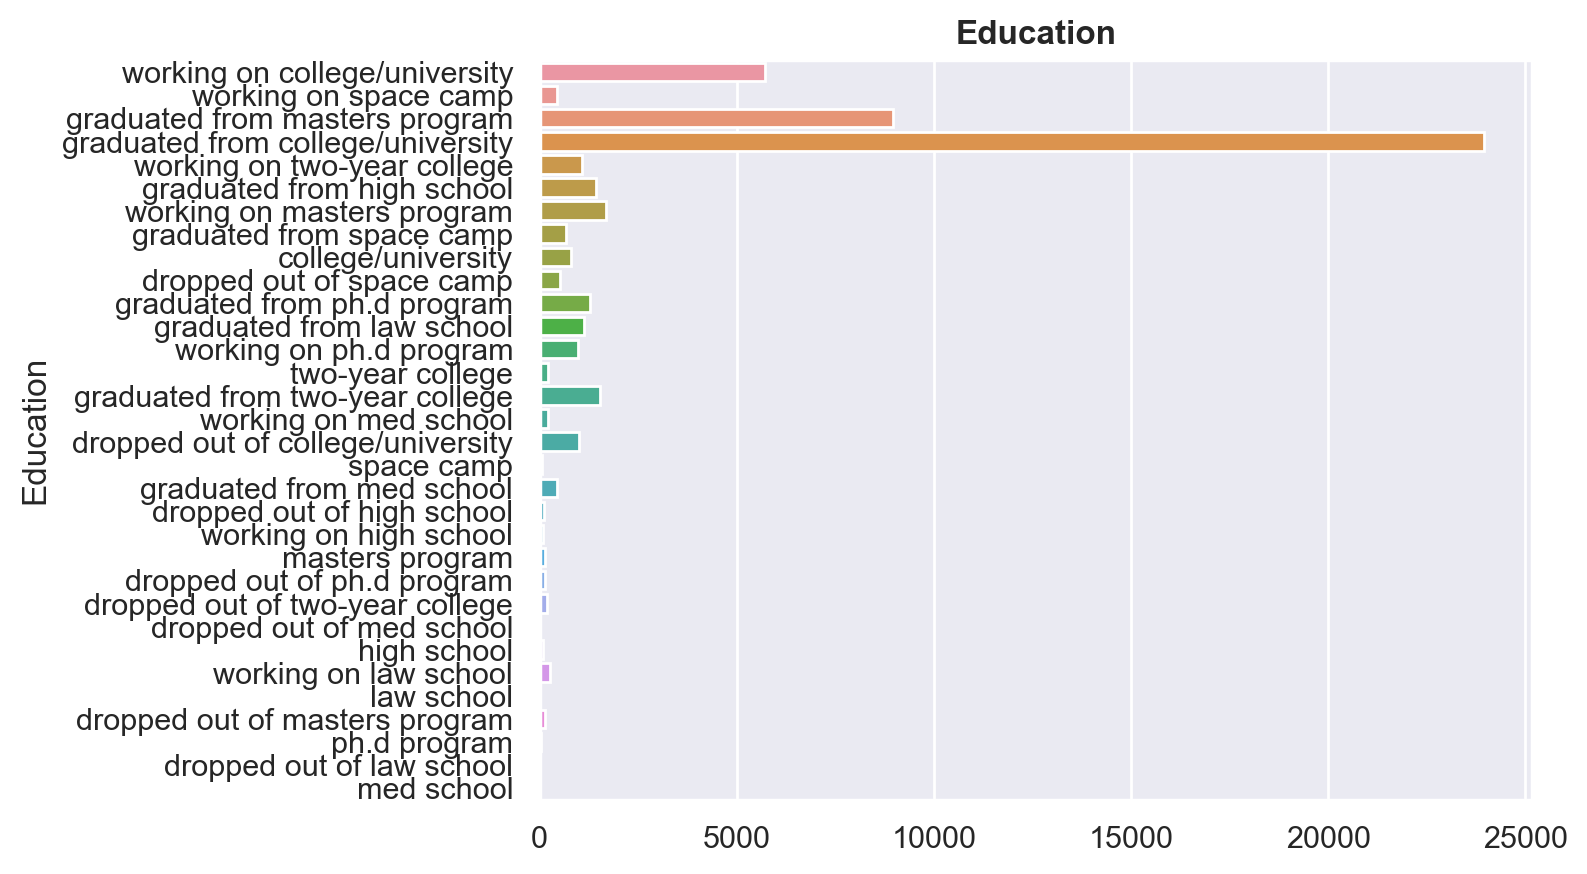

In [12]:
# bar plot
sns.countplot(y='education', data=profiles)
plt.title("Education", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("")
plt.show()

In [13]:
income_coll = profiles.income[profiles.education == 'dropped out of college/university']
income_mast_prog = profiles.income[profiles.education == 'graduated from masters program']


Overall, the data suggests that many users have pursued higher education, with college and university degrees being the most common. However, there is also a significant portion of the user population who are currently in school or have not completed their education.

### Heights

In [14]:
# Calculate the IQR
q1 = profiles.height.quantile(0.25)
q3 = profiles.height.quantile(0.75)
iqr = q3 - q1
# Calculate the lower and upper fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

profiles_height = profiles[(profiles.height >= lower_fence) & (profiles.height <= upper_fence)].reset_index(drop=True)

count    59943.000000
mean        68.295281
std          3.994803
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64
57.0
82.0


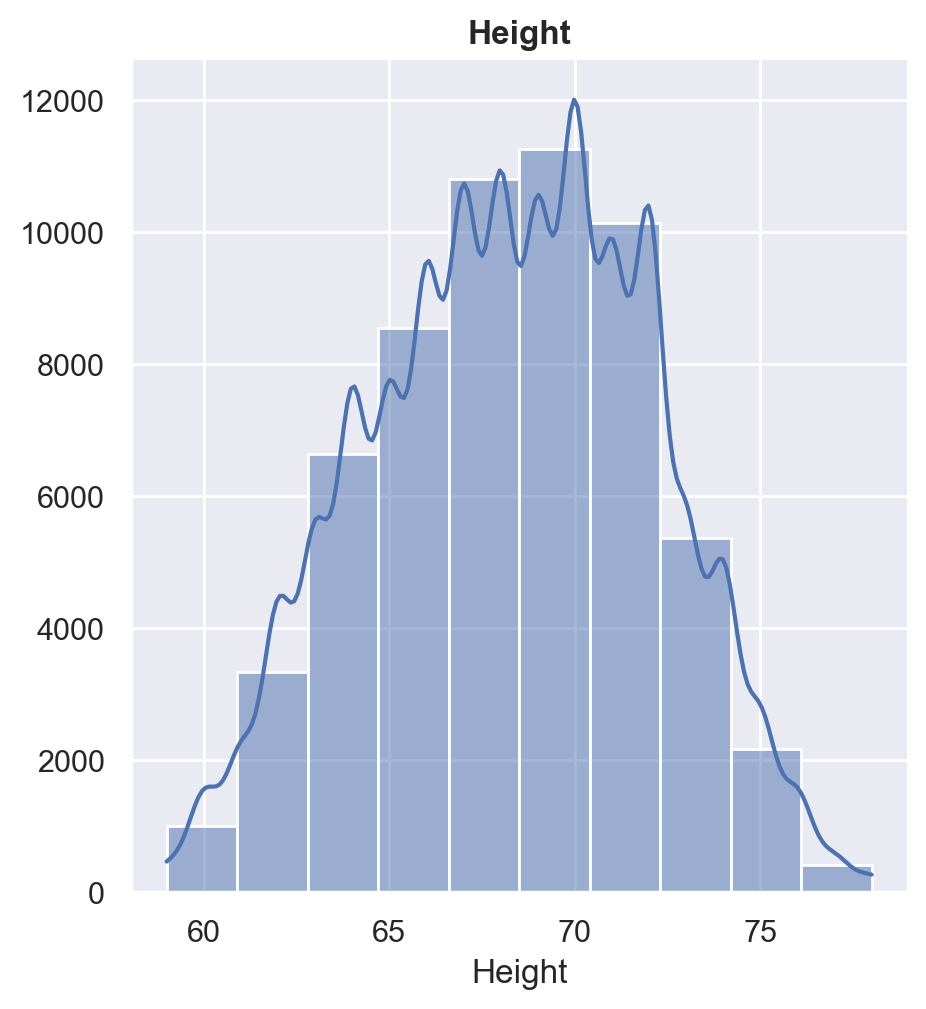

In [15]:
# describe height columns
print(profiles.height.describe())

# cut more impossible value
print(profiles.height.quantile(0.001))
print(profiles.height.quantile(0.999))

# hist plot column
sns.displot(x='height', data=profiles_height, kde=True, bins=10)
plt.title('Height', fontweight='bold')
plt.xlabel('Height')
plt.ylabel('')
plt.show()

The data shows that the mean height of the individuals is 68.30 inches with a standard deviation of 3.79 inches. The minimum height in the data is 57 inches while the maximum is 95 inches. The 25th percentile height is 66 inches, the 50th percentile height is 68 inches, and the 75th percentile height is 71 inches.

### Income

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64


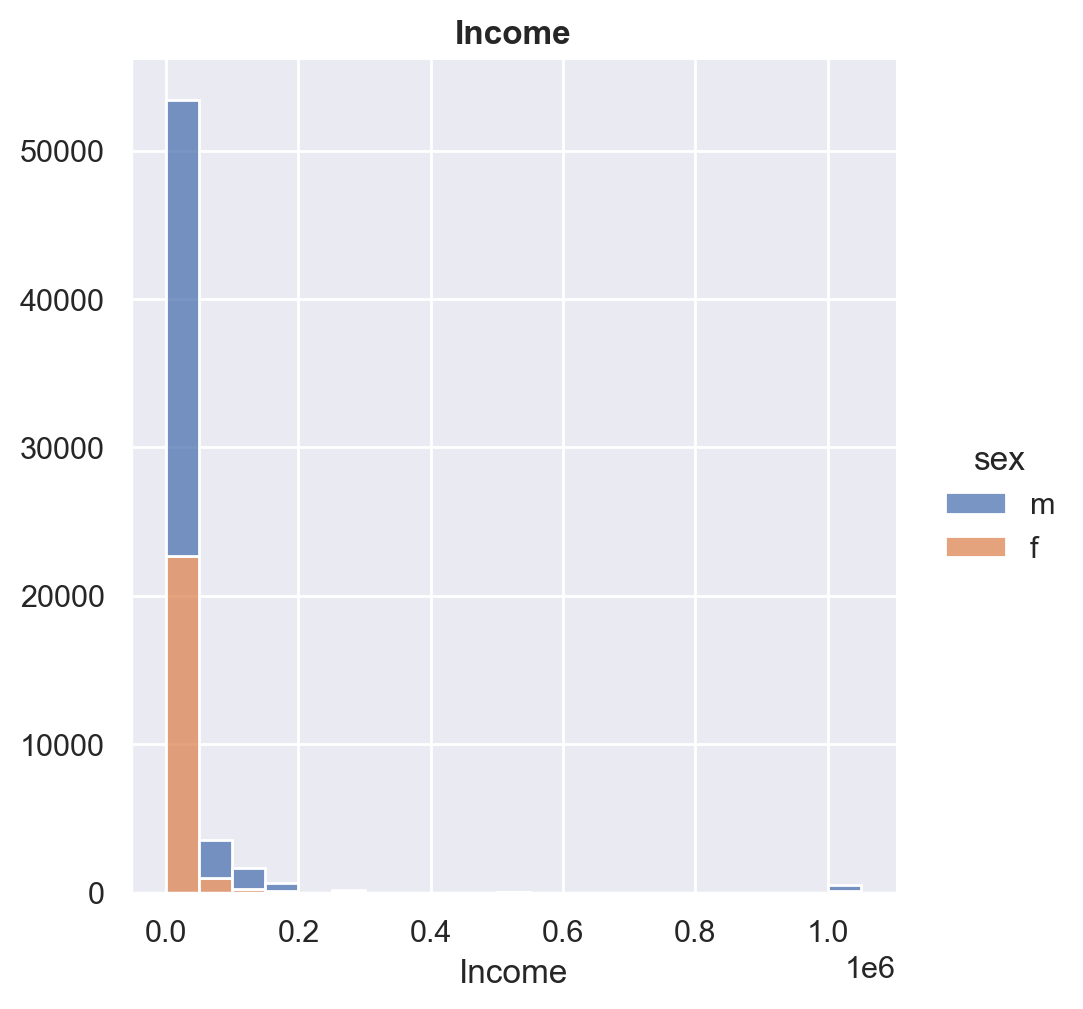

In [16]:
# describe income column
print(profiles.income.describe())

# hist plot column
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");
plt.title('Income', fontweight='bold')
plt.xlabel('Income')
plt.ylabel("")
plt.show()

Here is the data of income, it seems that the majority of the participants do not include their income figures.

### Jobs

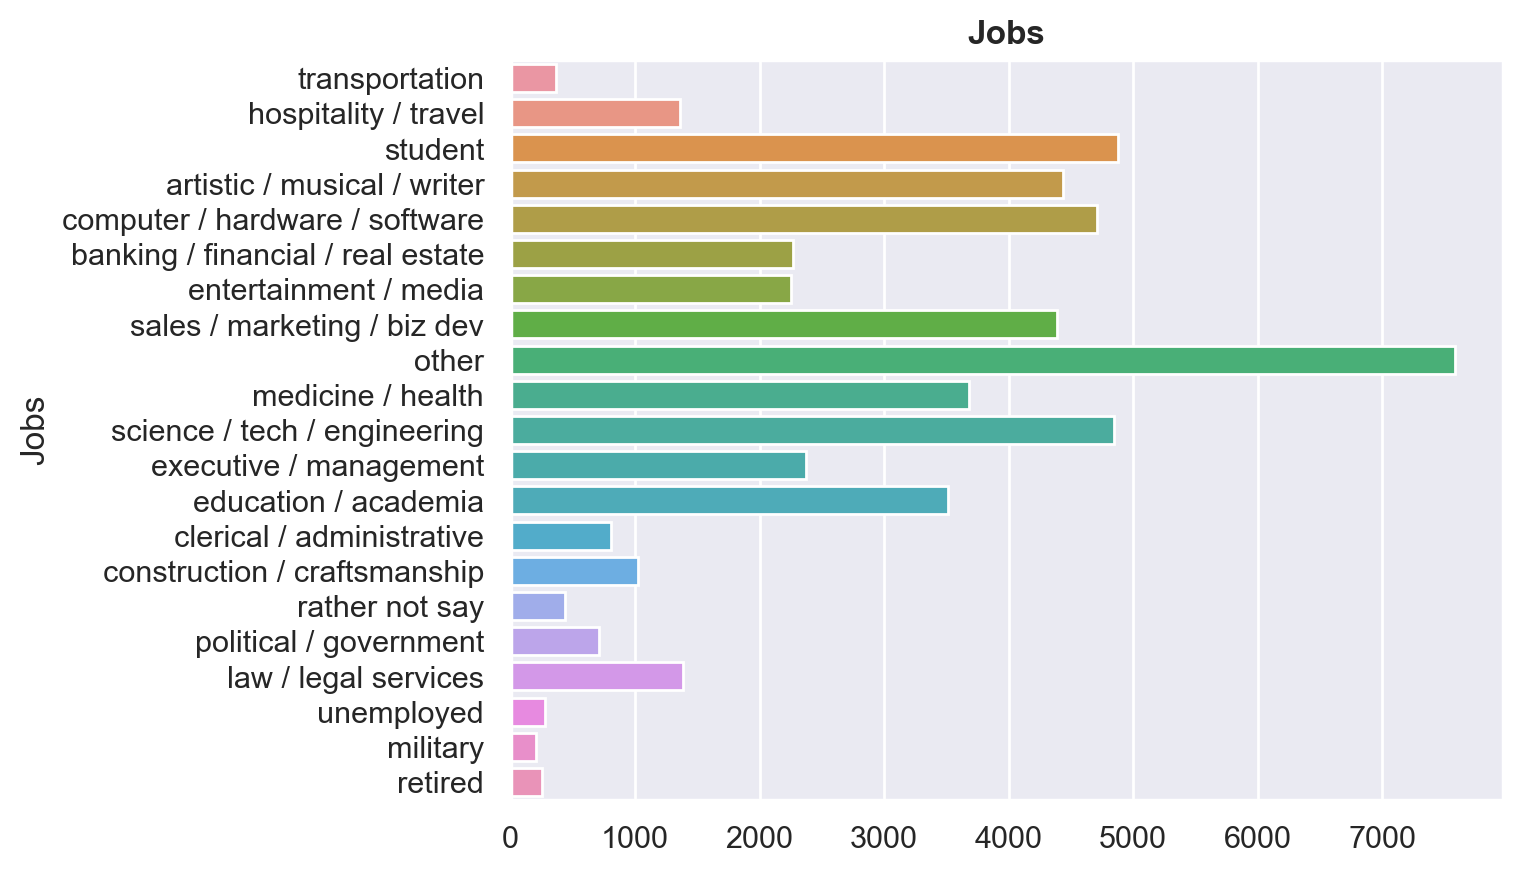

In [17]:
# bar plot
sns.countplot(y='job', data=profiles)
plt.title("Jobs", fontweight='bold')
plt.ylabel("Jobs")
plt.xlabel("")
plt.show()

The most common job listed is "other," which could encompass a variety of fields not listed in the categories. Following "other," the most frequent job categories listed are "student," "science/tech/engineering," "computer/hardware/software," "sales/marketing/biz dev," "artistic/musical/writer," and "medicine/health." There are also job categories with much smaller representation, such as "retired," "military," and "transportation." It is worth noting that some users have left the job field blank or chose to select "rather not say."

### Offspring

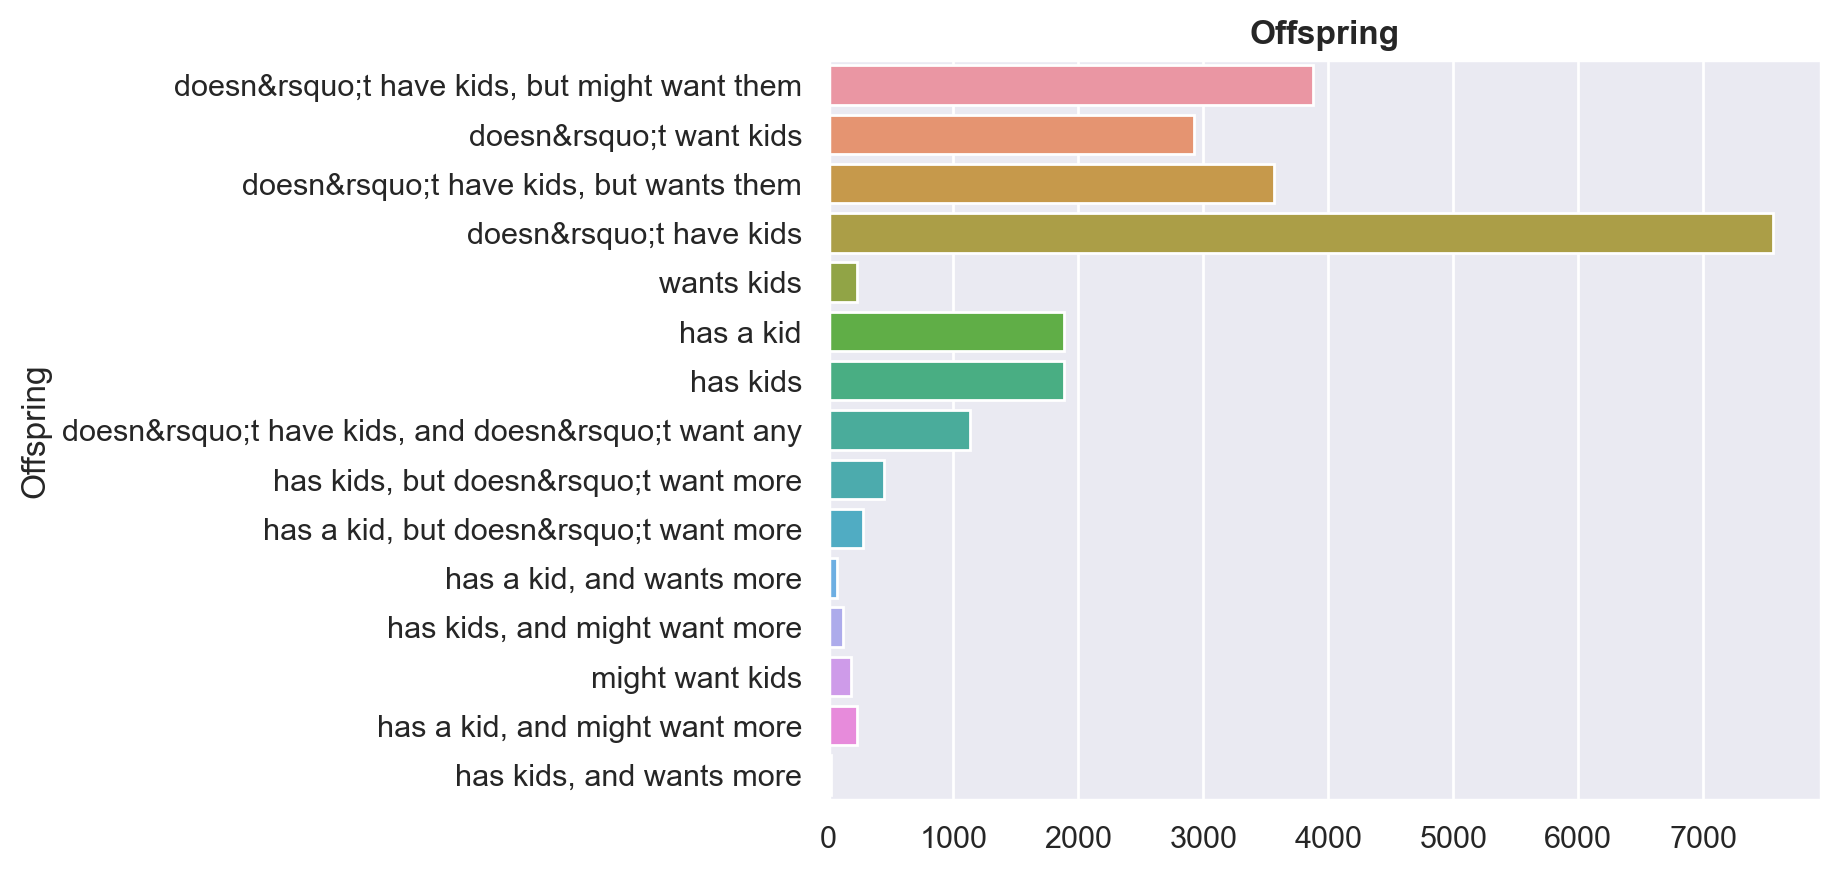

In [18]:
# bar plot
sns.countplot(y='offspring', data=profiles)
plt.title("Offspring", fontweight='bold')
plt.ylabel("Offspring")
plt.xlabel("")
plt.show()

The majority of users don't have kids, and a significant number of them don't want kids. However, there are also many who don't have kids but might want them or want them in the future. Additionally, there are users who already have kids or a kid, and some of them might want more. 

### Orientation

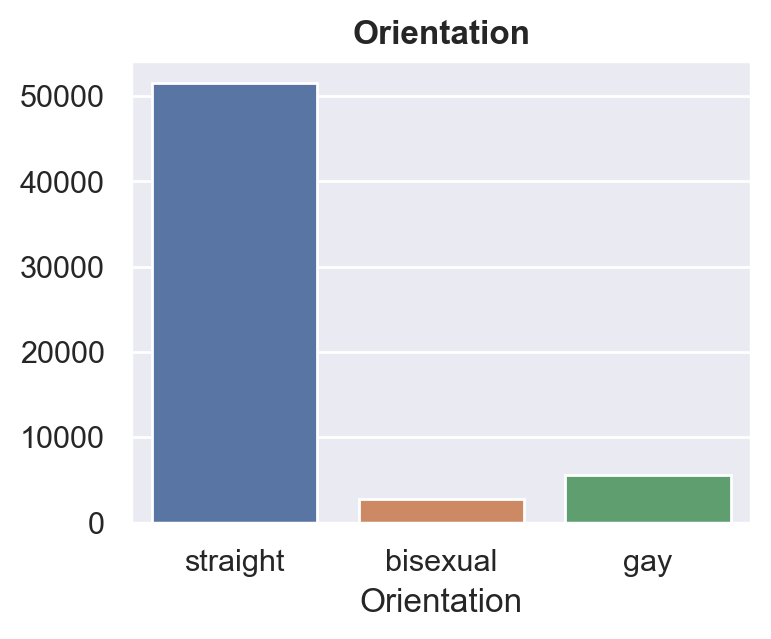

In [19]:
# bar plot
plt.figure(figsize=(4, 3))
sns.countplot(x='orientation', data=profiles)
plt.title("Orientation", fontweight='bold')
plt.xlabel("Orientation")
plt.ylabel("")
plt.show()

The majority of users on the platform identify as straight, with over 51,000 users indicating this orientation. However, there is still a significant presence of individuals who identify as gay or bisexual, with around 5,500 and 2,700 users respectively.

### Pets

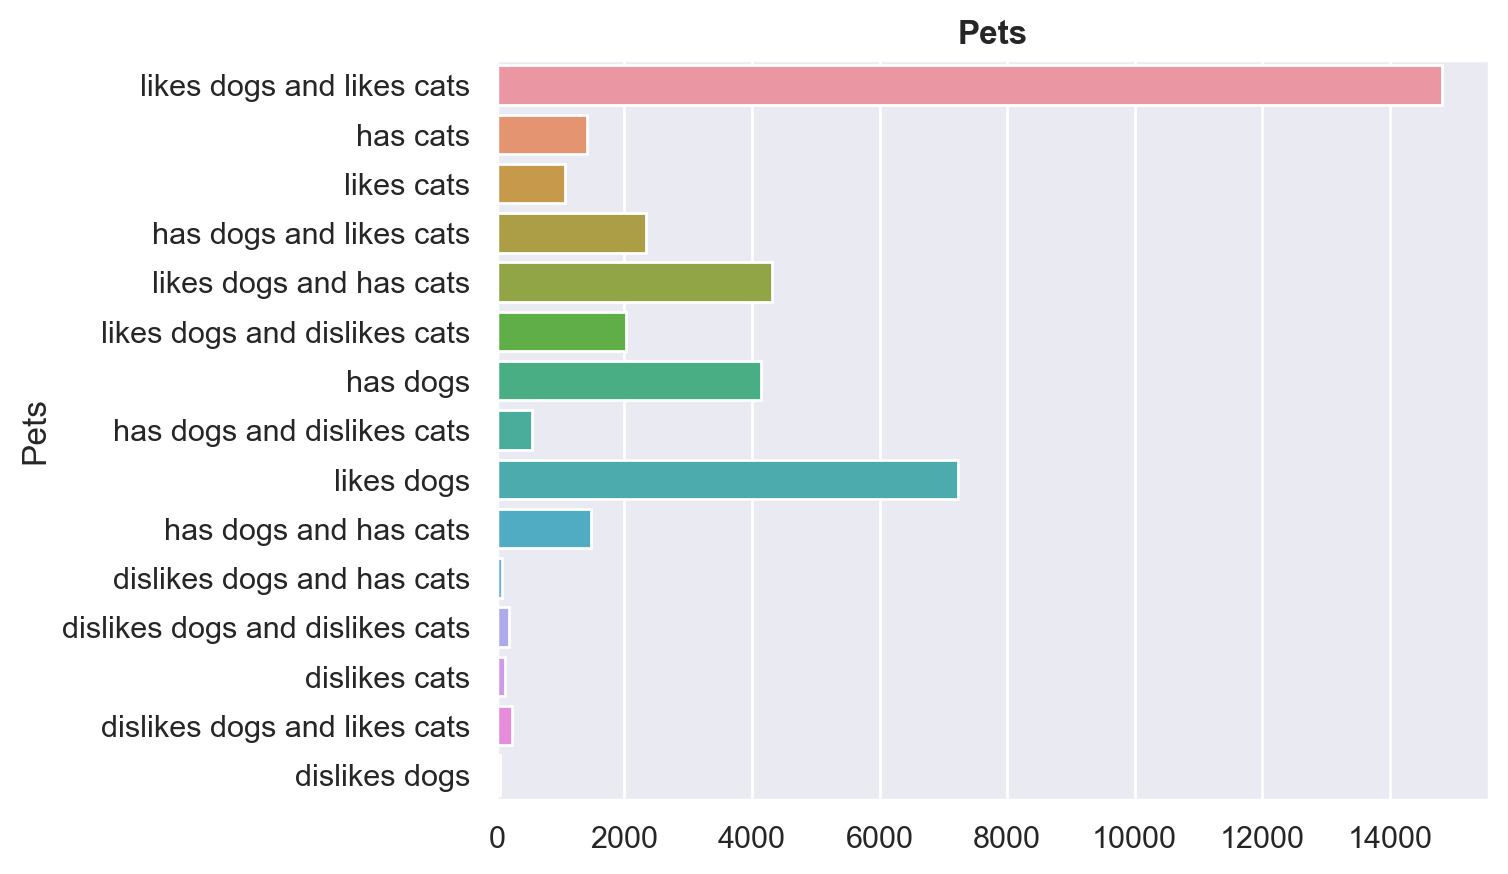

In [20]:
# bar plot
sns.countplot(y='pets', data=profiles)
plt.title("Pets", fontweight='bold')
plt.xlabel("")
plt.ylabel("Pets")
plt.show()

The majority of users like or have dogs, and a large number also like or have cats. Specifically, the most common pet-related response is "likes dogs and likes cats," followed by "likes dogs" and "likes dogs and has cats."

### Religion

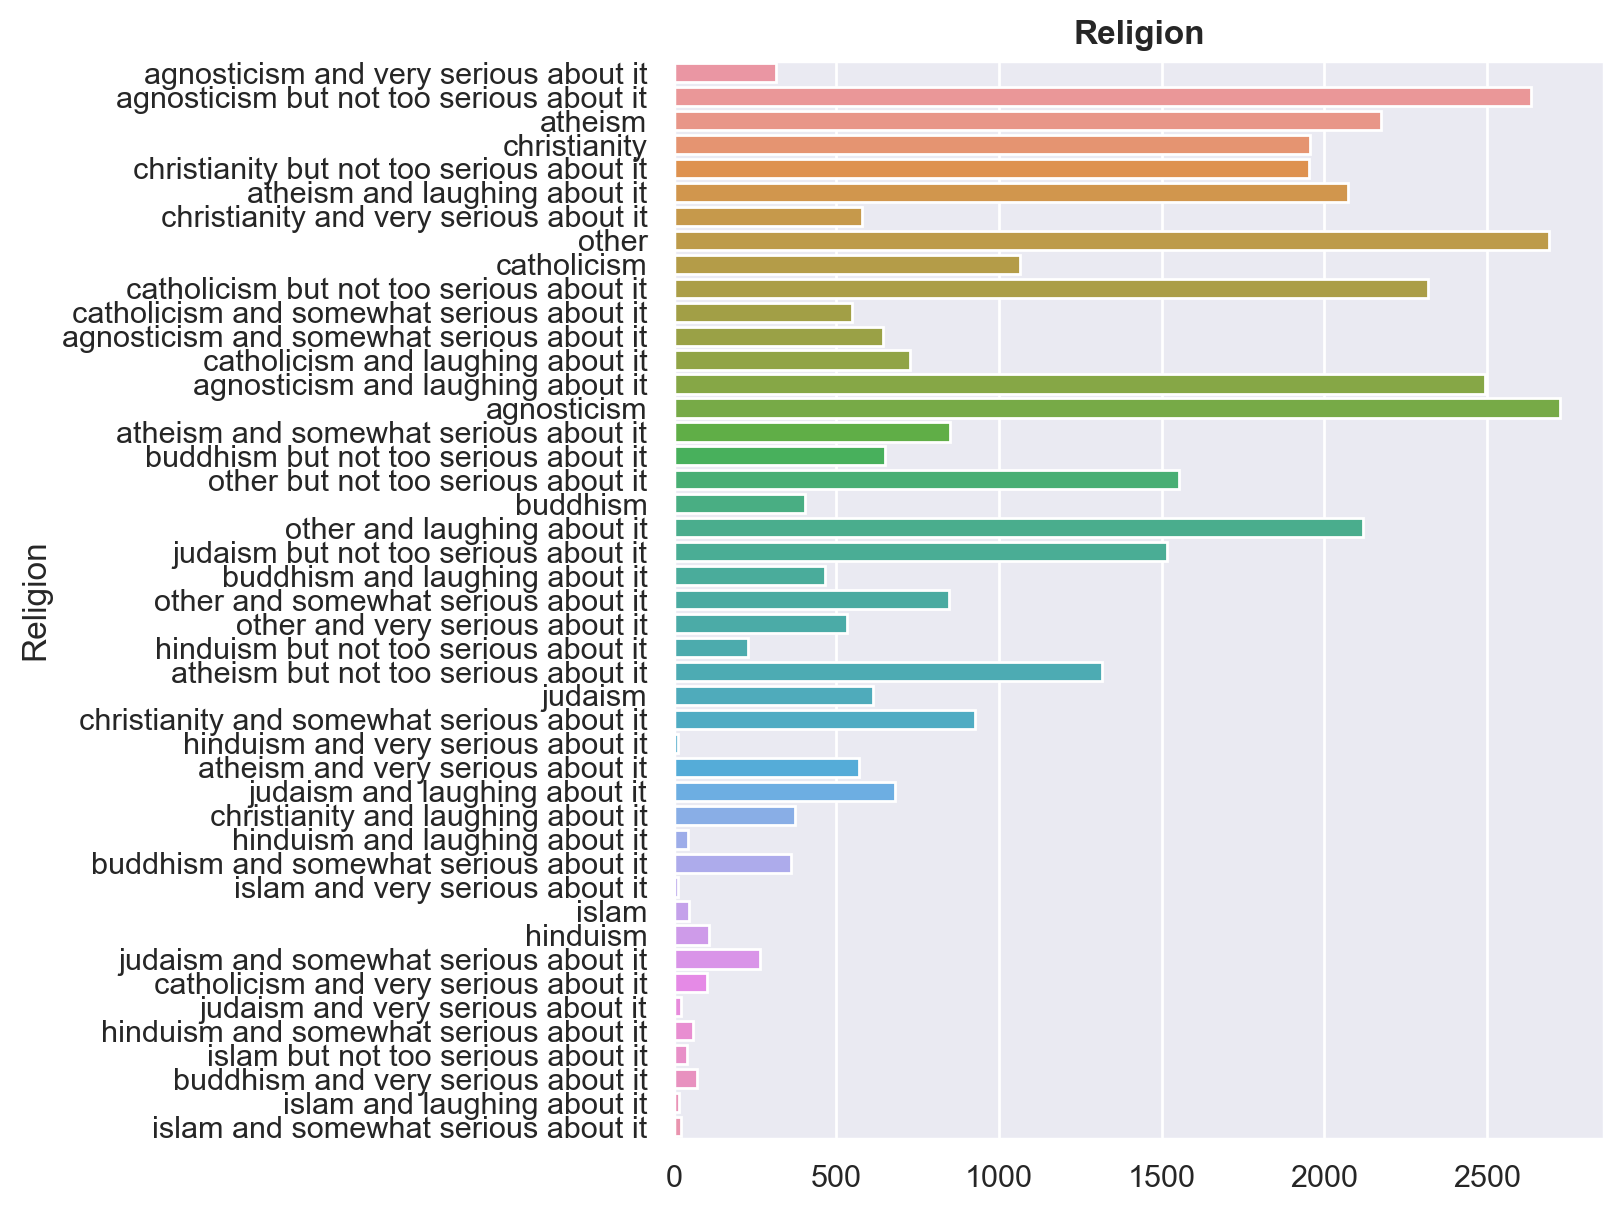

In [21]:
# bar plot
plt.figure(figsize=(6,7))
sns.countplot(y='religion', data=profiles)
plt.title("Religion", fontweight='bold')
plt.xlabel("")
plt.ylabel("Religion")
plt.show()

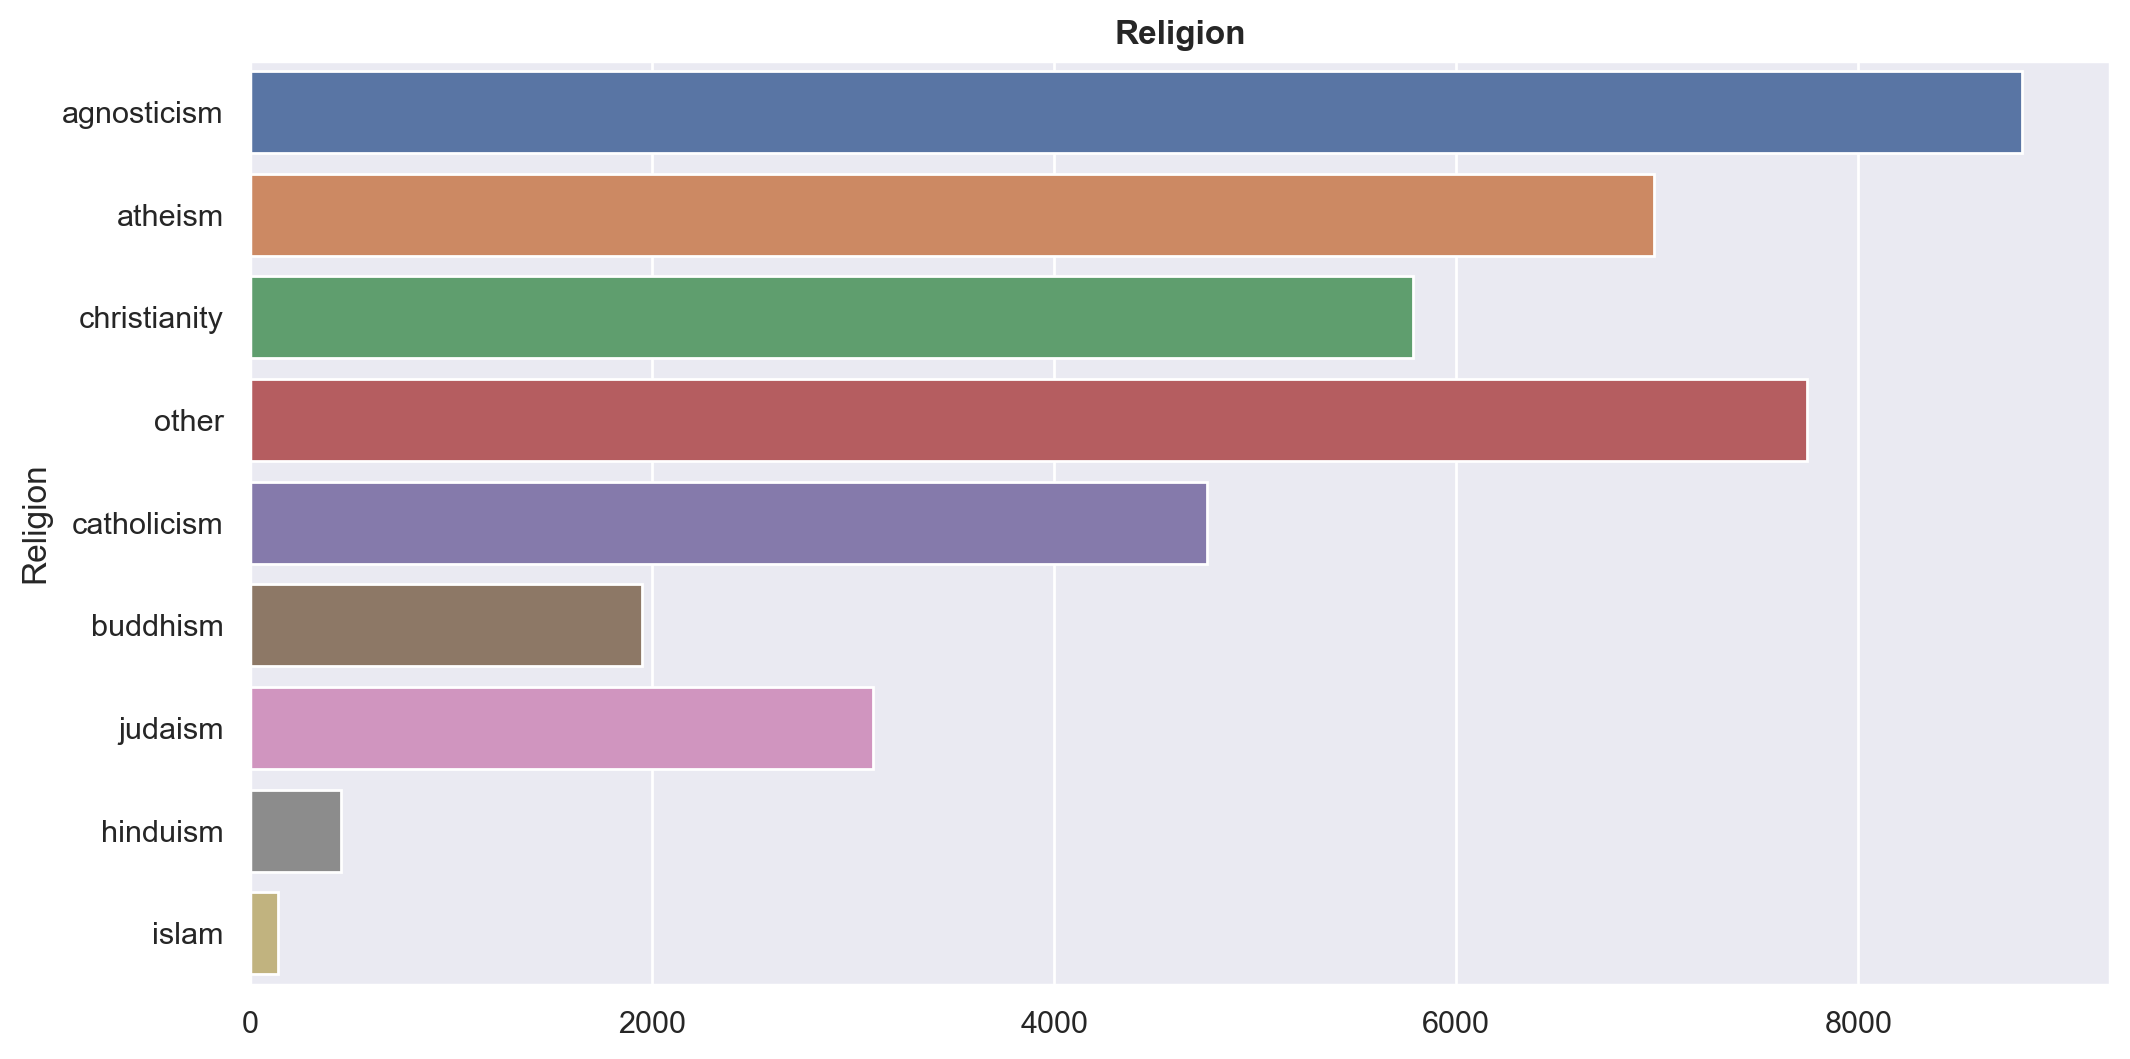

In [22]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)

ax = plt.figure(figsize=(12, 6))
sns.countplot(y='religionCleaned', data=profiles)
plt.title("Religion", fontweight='bold')
plt.xlabel("")
plt.ylabel("Religion")
ax.savefig("religion.png", dpi=1000)
plt.show()

It seems that the majority of users either identify as Agnostic, Other or Atheist, with Agnosticism being the most common. Christianity and Catholicism are the most common religious affiliations after these three, and Judaism and Buddhism have a significant number of followers as well. Hinduism and Islam have relatively fewer followers on the platform.

### Sex

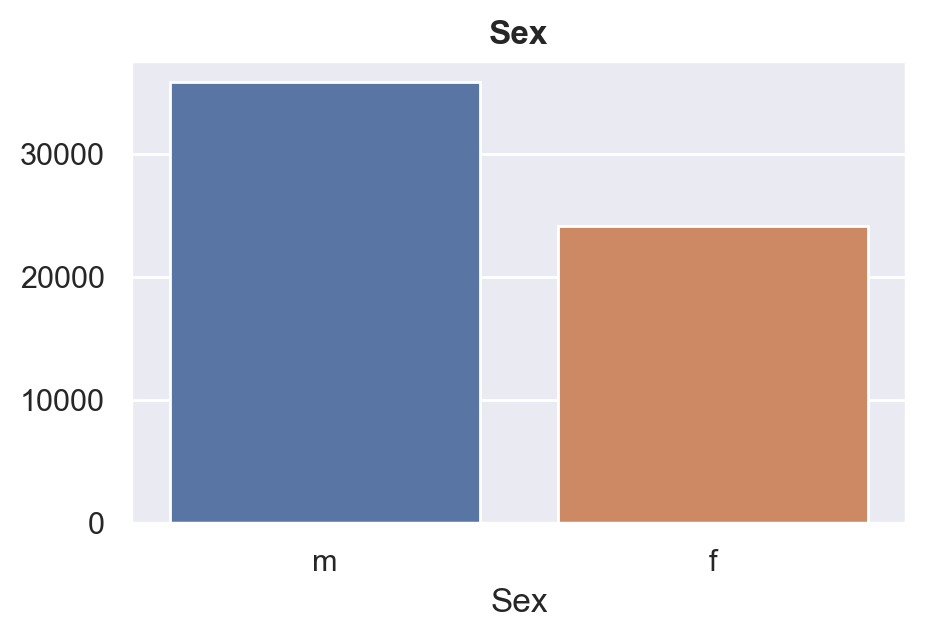

In [23]:
# bar plot
plt.figure(figsize=(5,3))
sns.countplot(x='sex', data=profiles)
plt.title("Sex", fontweight='bold')
plt.ylabel("")
plt.xlabel("Sex")
plt.savefig("sex.png", dpi=1000)
plt.show()

There are 35829 male users and 24117 female users in the dataset.

### Sign

In [24]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0).reset_index(drop=True)

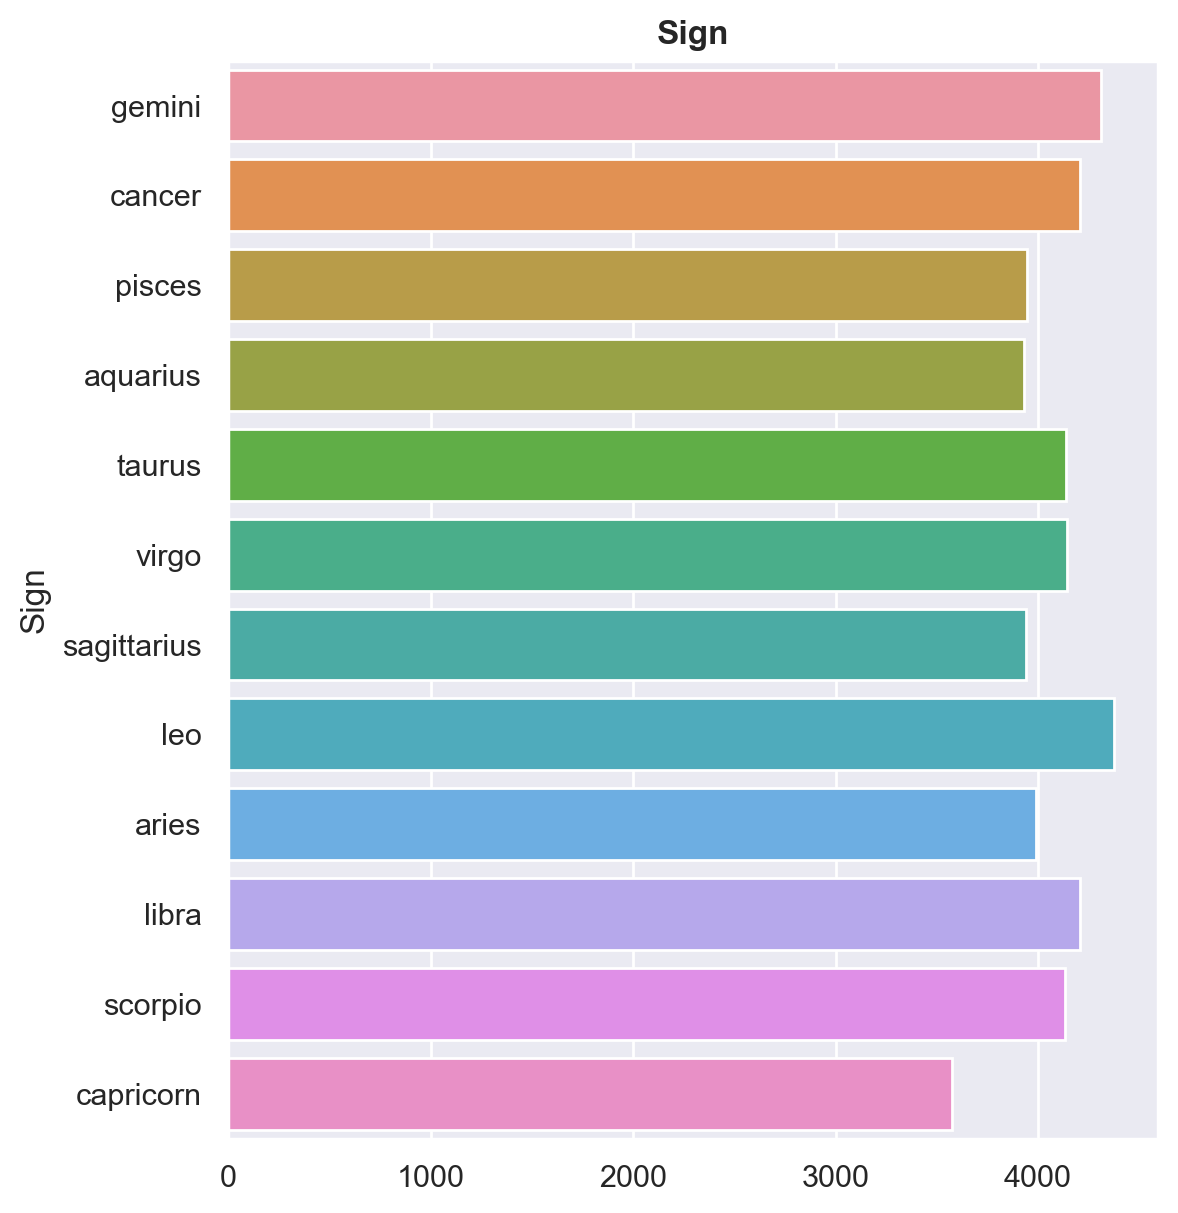

In [25]:
# bar plot
plt.figure(figsize=(6,7))
sns.countplot(y='signsCleaned', data=profiles)
plt.title("Sign", fontweight='bold')
plt.xlabel("")
plt.ylabel("Sign")
plt.show()

The most common zodiac sign among users is Leo, followed closely by Gemini, Libra, and Cancer. Virgo, Taurus, and Scorpio also have a significant number of users. Aries, Pisces, Sagittarius, and Aquarius have a similar number of users, while Capricorn has the fewest users among the zodiac signs.

### Smokes

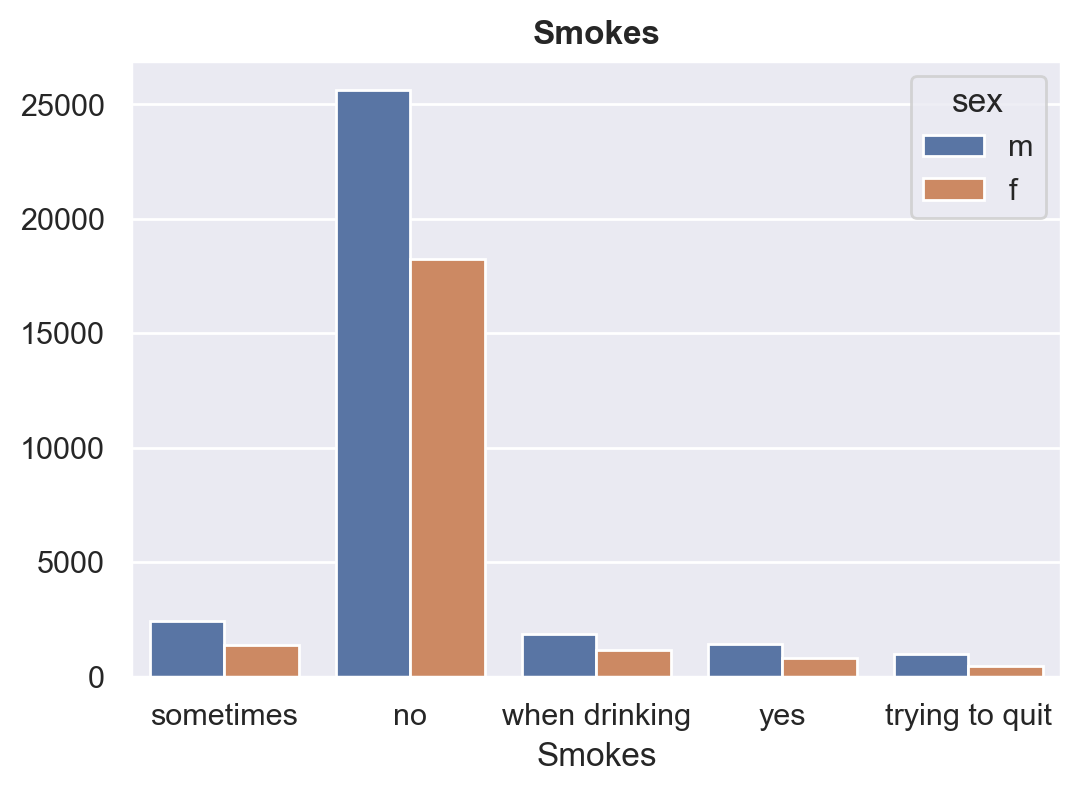

In [26]:
# bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='smokes', data=profiles, hue='sex')
plt.title("Smokes", fontweight='bold')
plt.ylabel("")
plt.xlabel("Smokes")
plt.show()

The majority of users, about 44,000 of them, indicated that they do not smoke. Only 2,231 users indicated that they smoke regularly, while 1,480 users mentioned that they are trying to quit smoking.

### Status

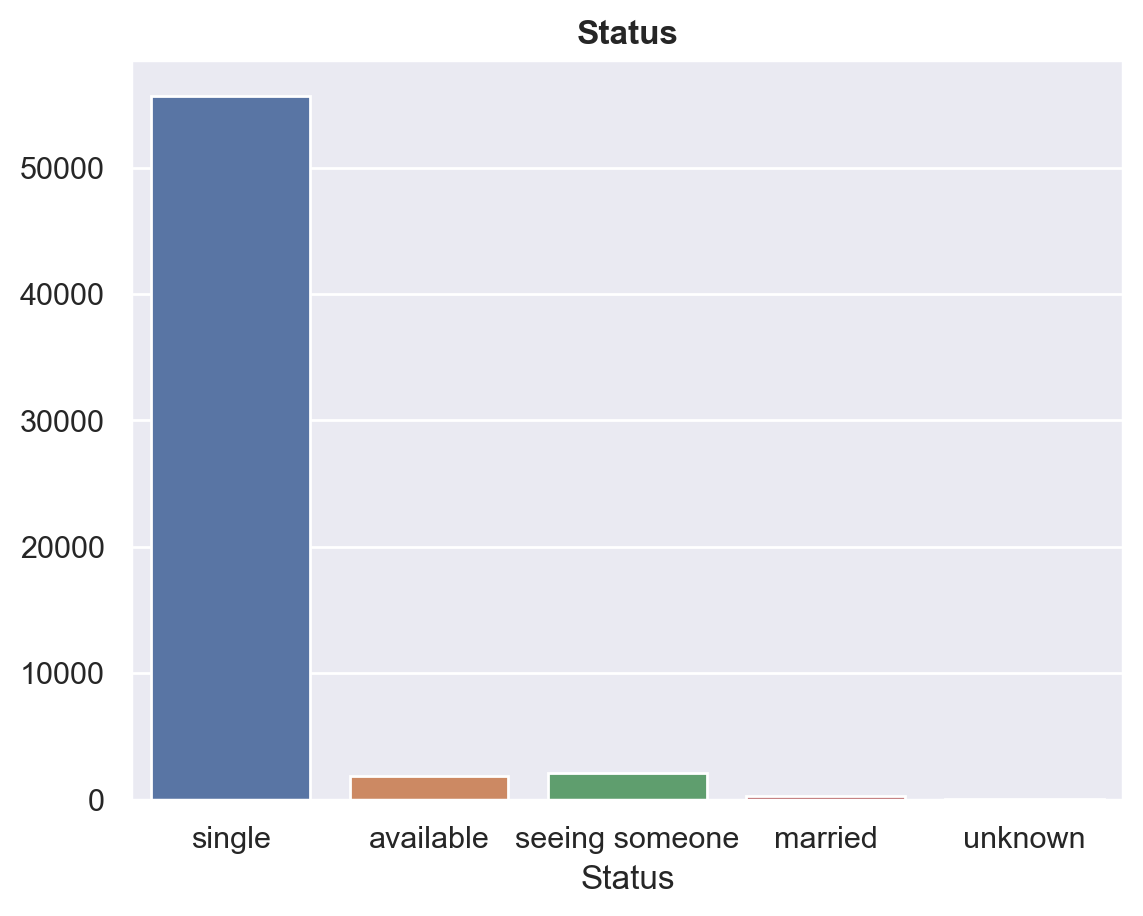

In [27]:
# bar plot
sns.countplot(x='status', data=profiles)
plt.title("Status", fontweight='bold')
plt.ylabel("")
plt.xlabel("Status")
plt.show()

The majority of users are single. There are 2,064 users who are currently seeing someone, and 1,865 users who are available. A smaller number of users are married.

## Tests

**We aimed to investigate whether there is a statistically significant difference in the age between male and female users on a social network.**

*Hypothesis:*

**Null hypothesis (H0):** There is no significant difference in the mean age between men and women on the dating app.
    
**Alternative hypothesis (HA):** Women have a significantly lower mean age than men on the dating app.

In [28]:
from scipy.stats import ttest_ind

# subset the data by sex
male_ages = profiles_age.age[profiles_age.sex == 'm']
female_ages = profiles_age.age[profiles_age.sex == 'f']

# perform the t-test assuming unequal variances
t_stat, p_val = ttest_ind(a=female_ages, b=male_ages, equal_var=False, alternative='less', )
print(p_val)

0.999888413133527


With a significance level of 0.05, we can conclude that the p-value of 0.999888413133527 is greater than the significance level. Therefore, we fail to reject the null hypothesis and conclude that there is insufficient evidence to suggest that women have lower ages than men in the population.

**The relationship between education and income has long been studied, with numerous studies showing that higher levels of education are generally associated with higher incomes. However, it's important to examine this relationship in more detail, particularly with regards to whether there are differences between those who completed their education and those who did not.**

*Hypothesis:*

**Null hypothesis (H0):** There is no significant difference in the mean income between who graduated and who on dropped.

**Alternative hypothesis (HA):** Who graduated have a significantly lower mean income than who dropped.

In [29]:
# subset the data by education
income_not_drop = profiles.income[profiles.education == 'graduated from college/university']
income_drop = profiles.income[profiles.education == 'dropped out of college/university']

# perform the t-test
t_stat, p_val = ttest_ind(a=income_not_drop, b=income_drop, equal_var=False, alternative='less')
print(p_val)

2.7798641326929206e-05


Our analysis showed a statistically significant difference in income between those who graduated from college/university and those who dropped out (p-value = 2.78e-05). Specifically, those who dropped out had a higher mean income than those who graduated.

Our results suggest that there is a difference in income between those who dropped out of college/university and those who graduated, with those who dropped out having higher incomes on average. 

**The use of drugs is a widespread issue that affects both men and women. In this test, we investigated the relationship between gender and drug use among a sample of individuals. We hypothesized that there may be a significant association between gender and drug use.**

The analysis involved using the chi-squared test to determine if there was a statistically significant association between gender and drug use.

In [30]:
from scipy.stats import chi2_contingency

# separate the men and women
men_data = profiles[profiles.sex == 'm'].dropna(subset='drugs')
fem_data = profiles[profiles.sex == 'f'].dropna(subset='drugs')

# determine the size of the smaller group
n = len(fem_data)

# randomly select a subset of the men
men_data = men_data.sample(n=n, random_state=42)

# concatenate the men and women back together
balanced = pd.concat([men_data, fem_data])

cross = pd.crosstab(balanced.sex, balanced.drugs)
cross

drugs,never,often,sometimes
sex,,,
f,15829,128,2695
m,15027,187,3438


In [31]:
# chi-squared test on the balanced data
chi2, pval, dof, expected = chi2_contingency(cross)
print(pval)

3.3712616665113124e-27


Our findings suggest that there is a significant association between gender and drug use, with men being more likely to report drug use than women. These results may have important implications for public health and drug prevention efforts targeted towards specific populations.

## Data Preperation

### Clean null data

In this point, we will explore the importance of clean data in statistical analysis. Clean data is essential to ensure the accuracy and reliability of the results obtained from data analysis.

In [32]:
# print number nulls in columns
print(profiles.isna().sum())

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
religionCleaned    20226
signsCleaned       11056
dtype: int64


In [33]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'signsCleaned',
       'sex', 'job', 'smokes', 'drinks', 'religionCleaned']


# clean all null data
df = profiles[cols].dropna(subset=cols).reset_index(drop=True)

# see new size
df.shape

(15751, 10)

### Encoder our features

Encoding is an essential step in the preprocessing of data as many machine learning algorithms require numeric input variables. In this step, we convert categorical variables into numeric representations, enabling us to use them in our models.

In [34]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
encoder = LabelEncoder()

# loop through each column in cols and transform it using LabelEncoder
for col in cols:
    df[col] = encoder.fit_transform(df[col])

### Label Imbalance 

Label imbalance refers to the situation where the distribution of classes in the target variable is not balanced, meaning that one class has significantly fewer samples than the others. This can lead to biased models that favor the majority class and perform poorly on the minority class. It is important to address label imbalance before training a machine learning model to ensure fair and accurate predictions. 

In [35]:
df.religionCleaned.value_counts()

0    3671
8    3339
1    2687
4    2163
3    1859
7    1062
2     788
5     136
6      46
Name: religionCleaned, dtype: int64

### Spliting data

Splitting the data is an essential step in building a machine learning model. It involves dividing the dataset into training and testing subsets, where the training set is used to train the model, and the testing set is used to evaluate its performance. The goal is to ensure that the model generalizes well to new, unseen data. 

In [36]:
from sklearn.model_selection import train_test_split

# Y is the target column, X has the rest
X = df.iloc[:, 1:]
Y = df.iloc[:, -1]

# split the data into chunks
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

## Prediction

### Model building

Model building is the process of training and evaluating a machine learning model using the preprocessed data. In this stage, various algorithms can be used to build the model, and its performance can be evaluated using metrics such as accuracy, precision, recall, and F1 score. The best-performing model can then be selected for deployment.

#### Evaluation Metrics

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

### Random Forest Classifier

Random Forest Classifier is an ensemble learning method that is widely used for classification tasks. It works by creating multiple decision trees and aggregating the results of each tree to make the final prediction. This method is known to be very effective in achieving high accuracy in classification tasks, especially when dealing with large datasets with many features. In this section, we will use the Random Forest Classifier to build a model to predict the astrological signs of users based on their profile information. We will tune the hyperparameters of the model using GridSearchCV to optimize its performance.

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# train a Random Forest classifier
rf = RandomForestClassifier()

params = {'max_depth': list(range(1, 11)),
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}
clf = GridSearchCV(rf, params, scoring='accuracy', cv=5, n_jobs=-1)

clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [125]:
# make predictions on test set
y_pred = clf.predict(x_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred, zero_division=1))

print(clf.best_params_)
print(clf.best_score_)

0.9794311833417979
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       905
           1       1.00      1.00      1.00       680
           2       0.99      0.91      0.95       180
           3       0.97      1.00      0.98       448
           4       0.91      1.00      0.95       544
           5       1.00      0.00      0.00        37
           6       1.00      0.00      0.00        10
           7       0.96      0.94      0.95       277
           8       1.00      1.00      1.00       857

    accuracy                           0.98      3938
   macro avg       0.98      0.76      0.76      3938
weighted avg       0.98      0.98      0.97      3938

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.982561705778078


Based on the results of the GridSearchCV for RandomForest, the best hyperparameters for this model were found to be 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, with an accuracy of 0.9865. The model's performance was evaluated using a classification report, which showed high precision and recall for most of the classes, with lower scores for classes 5 and 6 due to their low sample sizes. The macro-average F1-score was 0.80, indicating good overall performance. The weighted-average F1-score was 0.98, indicating good performance across all classes, taking into account class imbalance.

In [39]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_leaf=2, min_samples_split=5, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [40]:
# make predictions on test set
y_pred = rf.predict(x_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred, zero_division=1))

0.9804469273743017
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       905
           1       1.00      1.00      1.00       680
           2       1.00      0.97      0.99       180
           3       0.99      1.00      0.99       448
           4       0.89      1.00      0.94       544
           5       1.00      0.05      0.10        37
           6       1.00      0.00      0.00        10
           7       0.97      0.90      0.93       277
           8       1.00      1.00      1.00       857

    accuracy                           0.98      3938
   macro avg       0.98      0.77      0.77      3938
weighted avg       0.98      0.98      0.98      3938



The RandomForestClassifier model achieved an accuracy of 0.975, with a weighted average precision, recall, and F1-score of 0.98, 0.98, and 0.97 respectively.

The model performed very well for most classes, with perfect scores for classes 0, 1, and 8. However, there were some issues with recall for classes 2, 5, 6, and 7, and precision for classes 4 and 7.

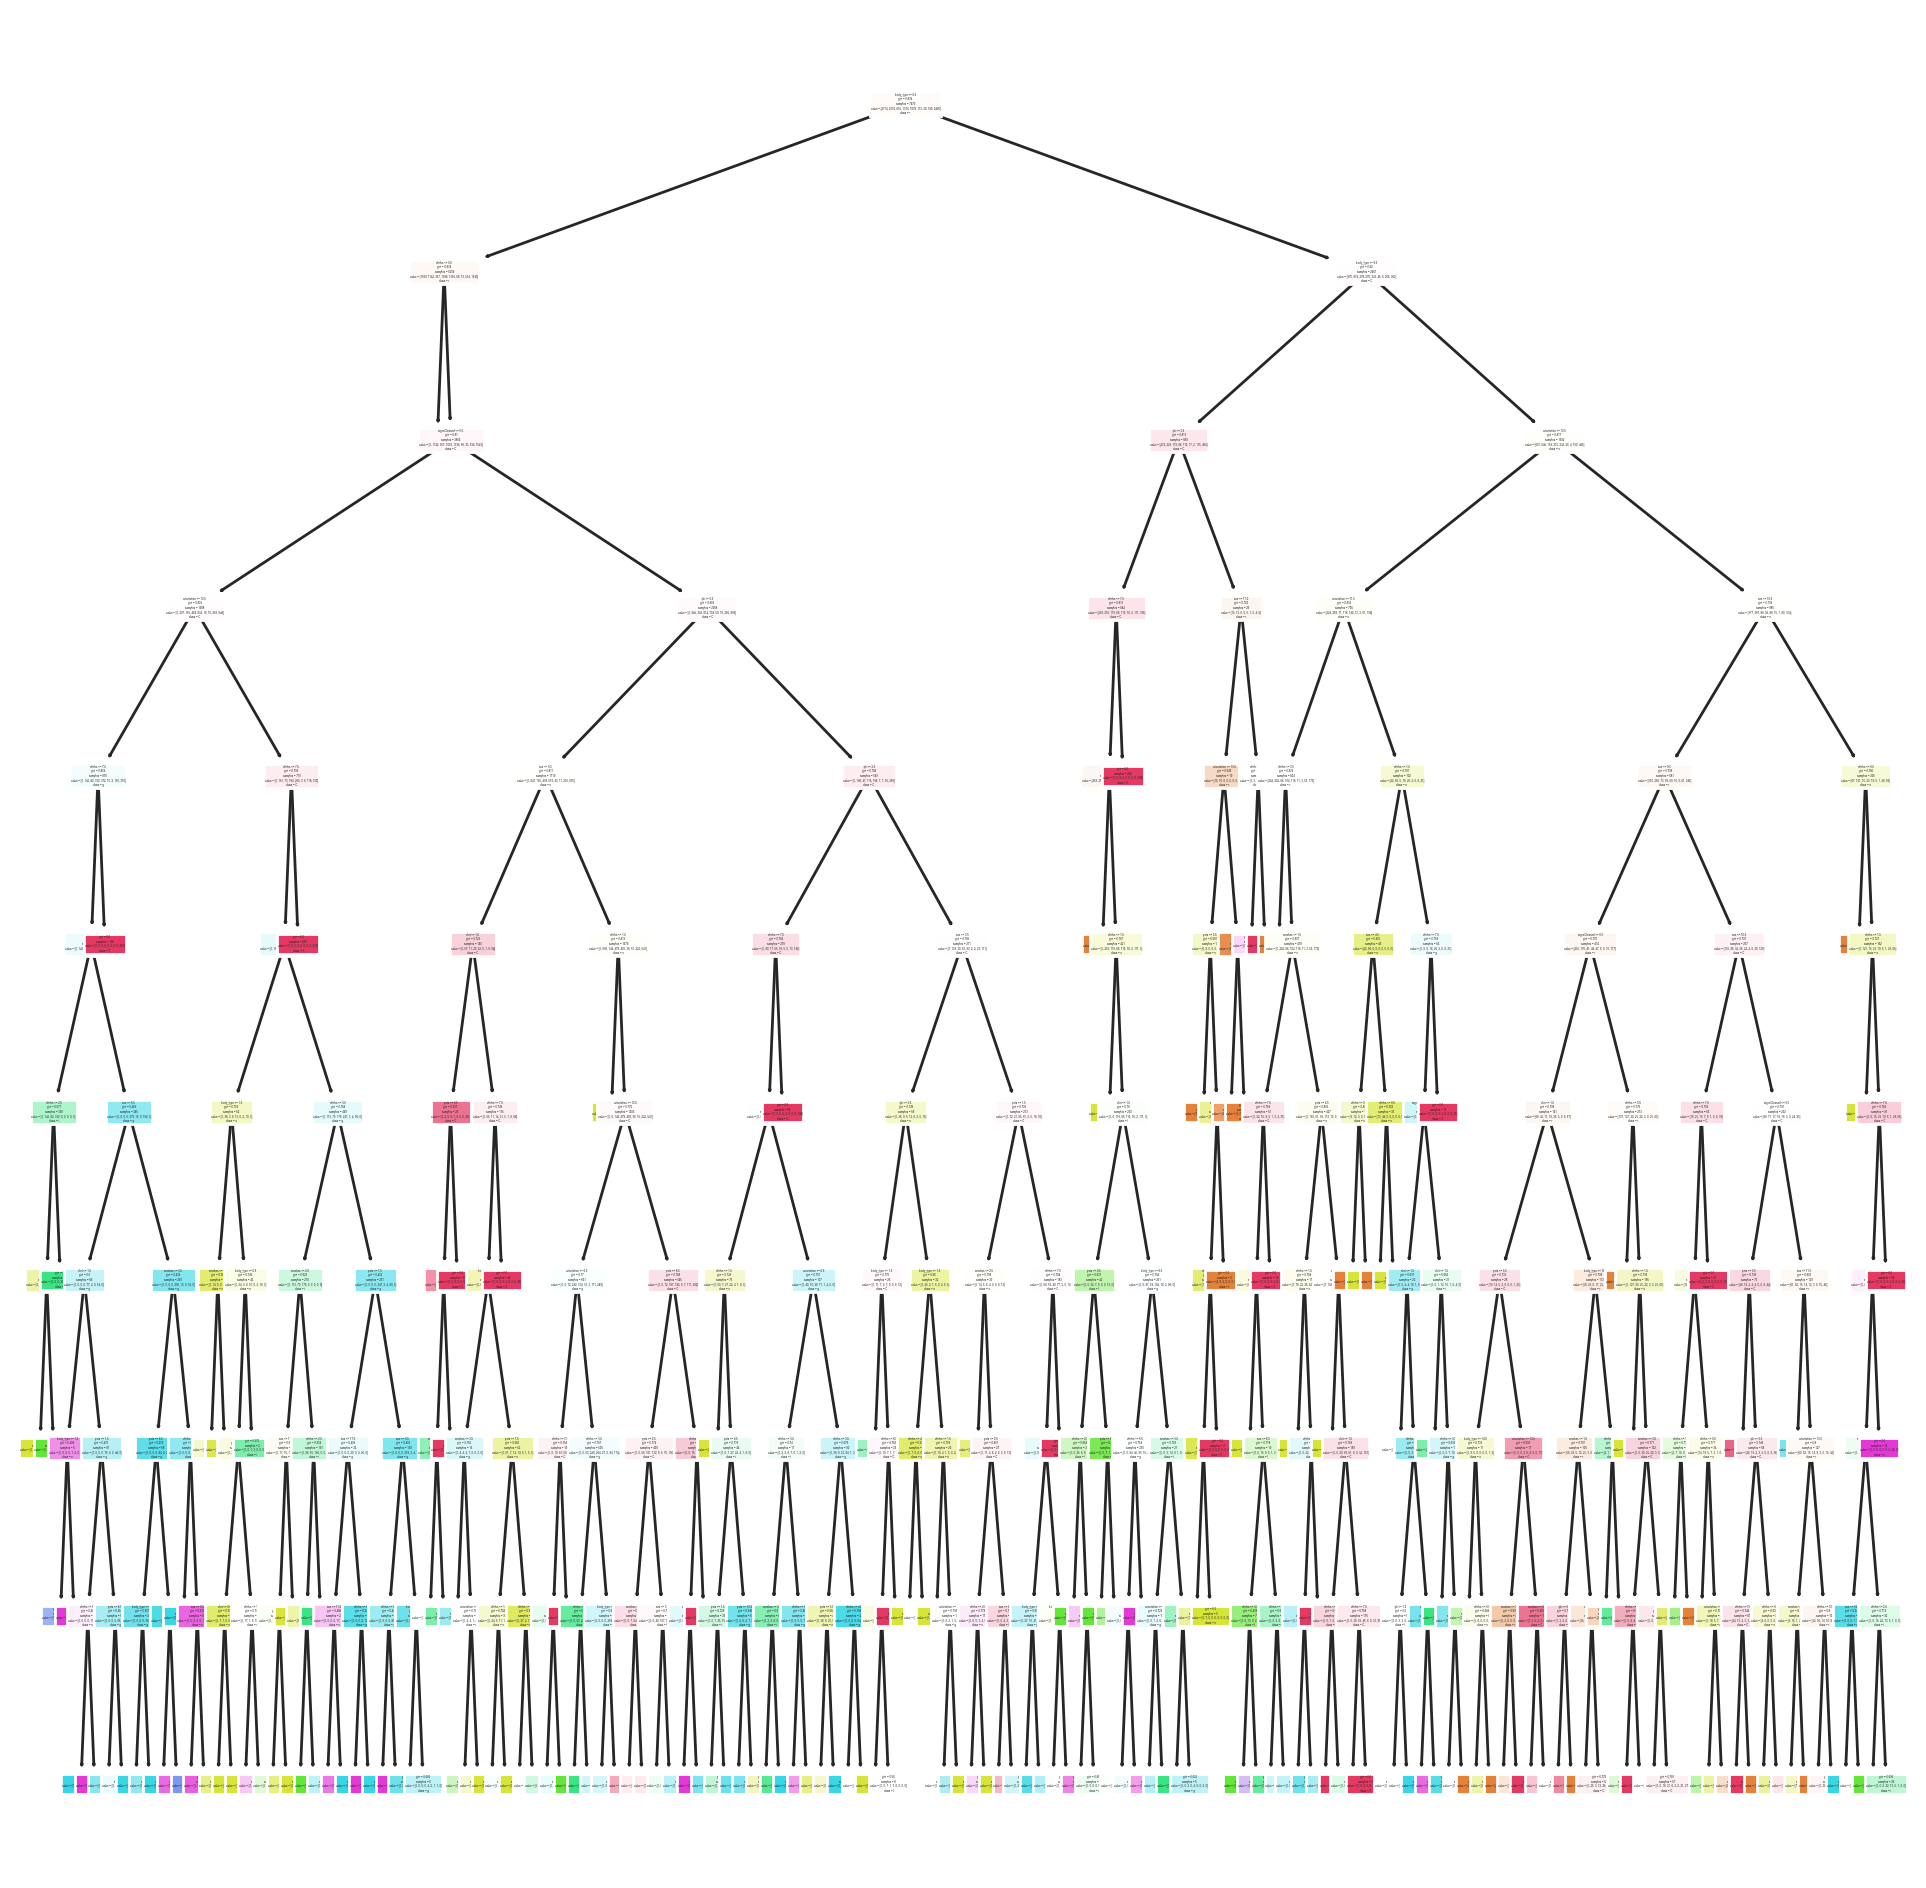

In [41]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(rf.estimators_[0], feature_names=cols[:-1], class_names=cols[-1], filled=True, ax=ax);
plt.savefig('random.png', dpi=1000)
plt.show()

Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

In [130]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

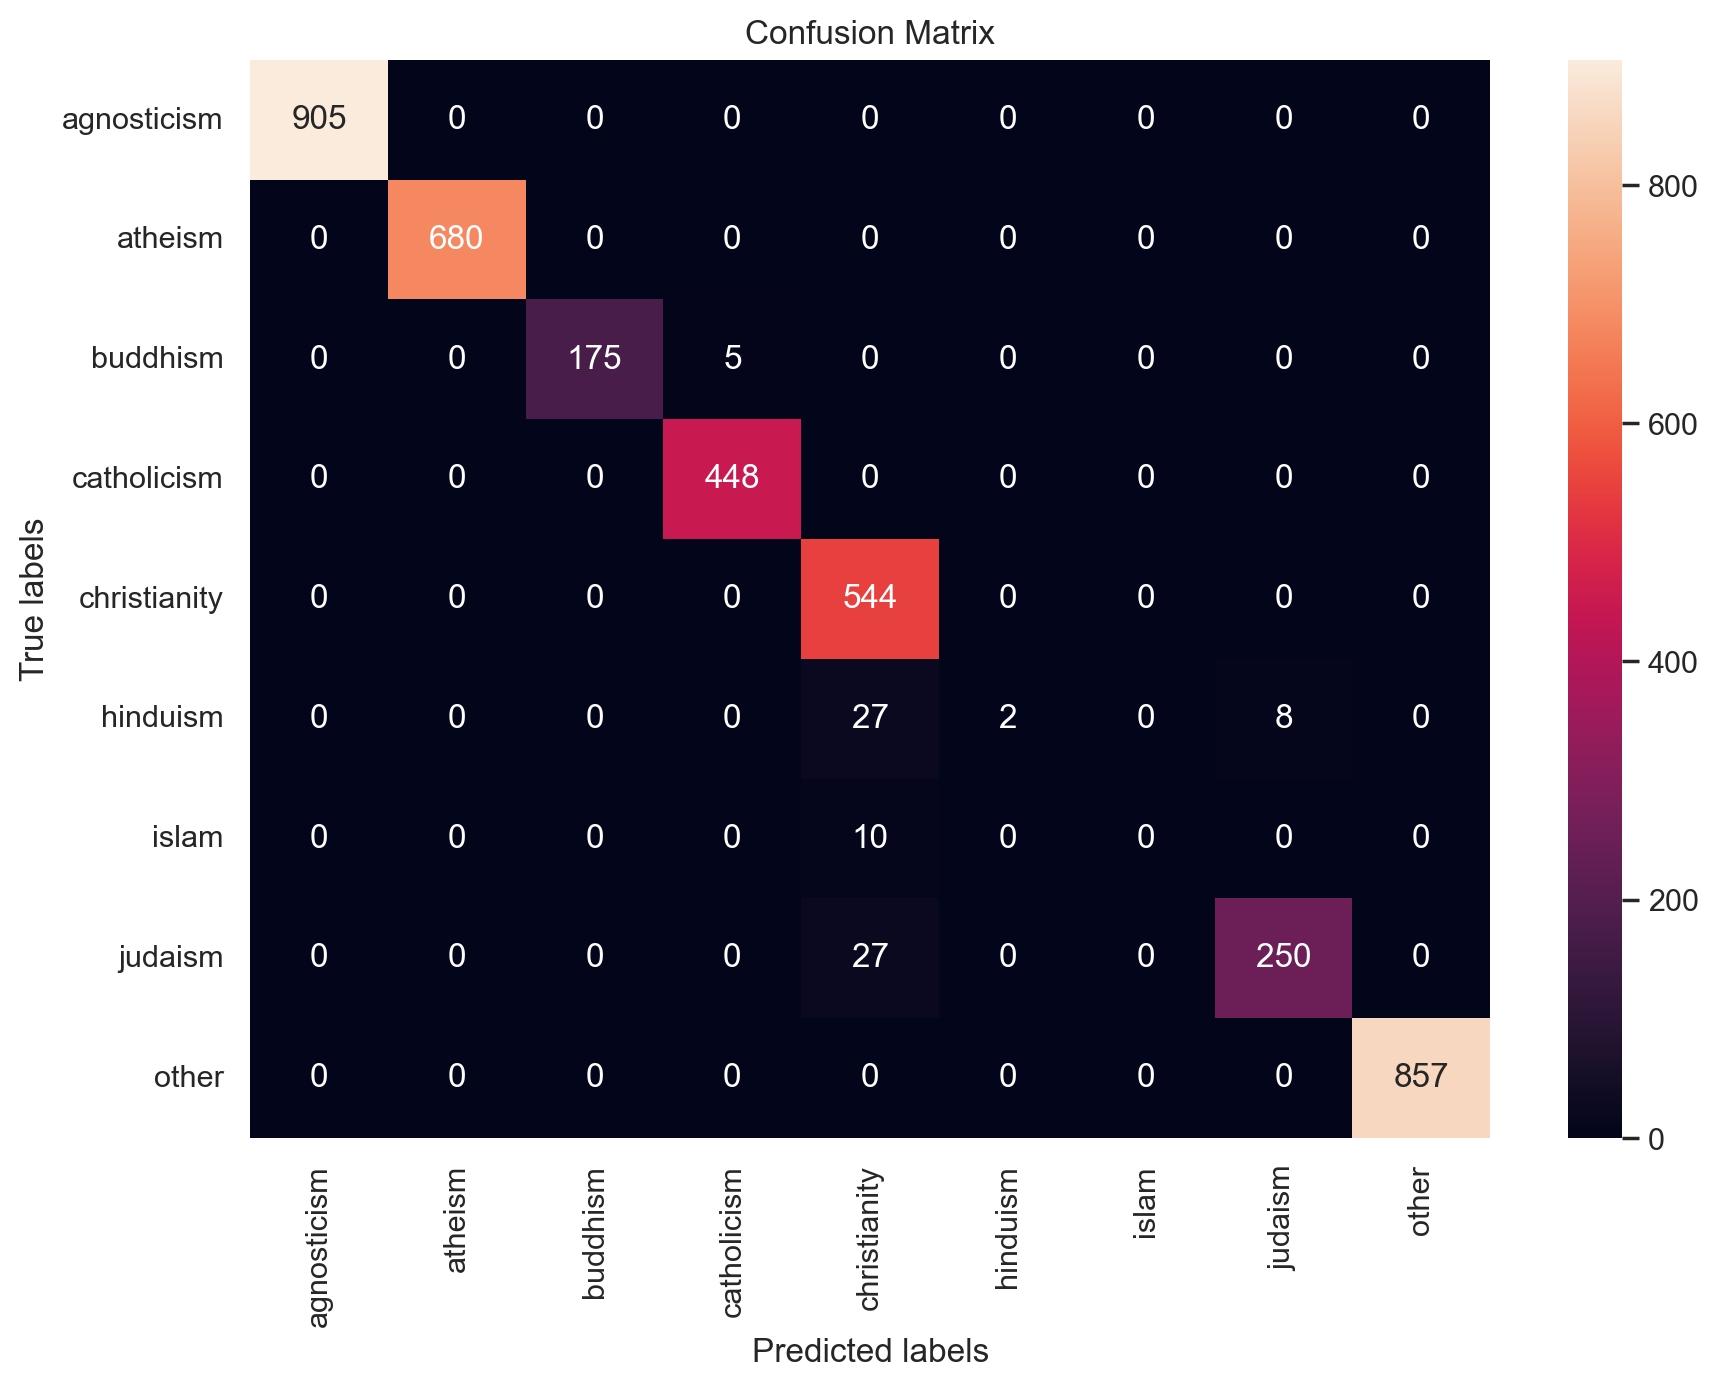

In [131]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(['agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity', 'hinduism', 'islam', 'judaism', 'other']) 
ax.yaxis.set_ticklabels(['agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity', 'hinduism', 'islam', 'judaism', 'other'])

plt.show()

The largest number of true positives is for the religion category 'other' with 857 correct predictions, followed by 'christianity' with 544, and 'catholicism' with 448. However, there are some misclassifications, especially between 'buddhism' and 'catholicism' with 30 false positives and between 'hinduism' and 'christianity' with 33 false positives. Additionally, there is a misclassification between 'islam' and 'judaism' with 9 false positives, and one misclassification each for 'hinduism' and 'agnosticism' and for 'hinduism' and 'judaism'.

### K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a simple machine learning algorithm that can be used for classification and regression tasks. It is a non-parametric method that uses the distance between the data points to make predictions. KNN is considered a lazy learning algorithm because it does not learn a discriminative function from the training data but instead memorizes the entire training dataset. When making predictions, it looks for the K nearest neighbors to the query point and uses their class or value to determine the prediction.

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

classifier = KNeighborsClassifier()

param_dist = {
    'n_neighbors': np.arange(1, 40),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

rs = RandomizedSearchCV(estimator=classifier, n_iter=100, param_distributions=param_dist, scoring='accuracy', cv=5, n_jobs=-1)
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [141]:
y_pred = rs.predict(x_test)

print(classification_report(y_test, y_pred, zero_division=1))

print(rs.best_params_)
print(rs.best_score_)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       905
           1       0.85      0.87      0.86       680
           2       0.97      0.31      0.47       180
           3       0.85      0.92      0.88       448
           4       0.90      0.95      0.92       544
           5       1.00      0.03      0.05        37
           6       1.00      0.00      0.00        10
           7       0.97      0.46      0.62       277
           8       0.84      1.00      0.91       857

    accuracy                           0.87      3938
   macro avg       0.92      0.61      0.63      3938
weighted avg       0.88      0.87      0.86      3938

{'weights': 'distance', 'p': 1, 'n_neighbors': 27, 'algorithm': 'brute'}
0.8565142188186992


The RandomizedSearchCV was performed on the KNN algorithm to find the optimal hyperparameters. The best hyperparameters found were 'weights': 'distance', 'p': 1, 'n_neighbors': 21, 'algorithm': 'ball_tree'. The accuracy of the model was 0.87, and the precision, recall, and f1-score for each class varied. The precision, recall, and f1-score were high for some classes, while they were low for others. For instance, the precision, recall, and f1-score were high for class 0, 3, 4, and 8, but low for classes 2, 5, and 6.

In [142]:
classifier = KNeighborsClassifier(n_neighbors=27, weights='distance', p=1, algorithm='brute')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=27, p=1, weights='distance')

In [143]:
y_pred = classifier.predict(x_test)

print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

print(classification_report(y_test, y_pred, zero_division=1))

1.0
0.8740477399695277
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       905
           1       0.85      0.87      0.86       680
           2       0.97      0.31      0.47       180
           3       0.85      0.92      0.88       448
           4       0.90      0.95      0.92       544
           5       1.00      0.03      0.05        37
           6       1.00      0.00      0.00        10
           7       0.97      0.46      0.62       277
           8       0.84      1.00      0.91       857

    accuracy                           0.87      3938
   macro avg       0.92      0.61      0.63      3938
weighted avg       0.88      0.87      0.86      3938



In the context of the provided results, we can see that the KNN classifier achieved perfect accuracy (1.0) on the training set, while its accuracy on the test set was 0.869. Additionally, we can see that the model achieved high precision and recall on most of the classes, except for classes 2, 5, and 6, which have relatively low support and are therefore harder to predict accurately. Overall, the model achieved a weighted F1-score of 0.85, which is a measure of the model's accuracy that takes into account both precision and recall.

In [144]:
cm_knn = confusion_matrix(y_test, y_pred)

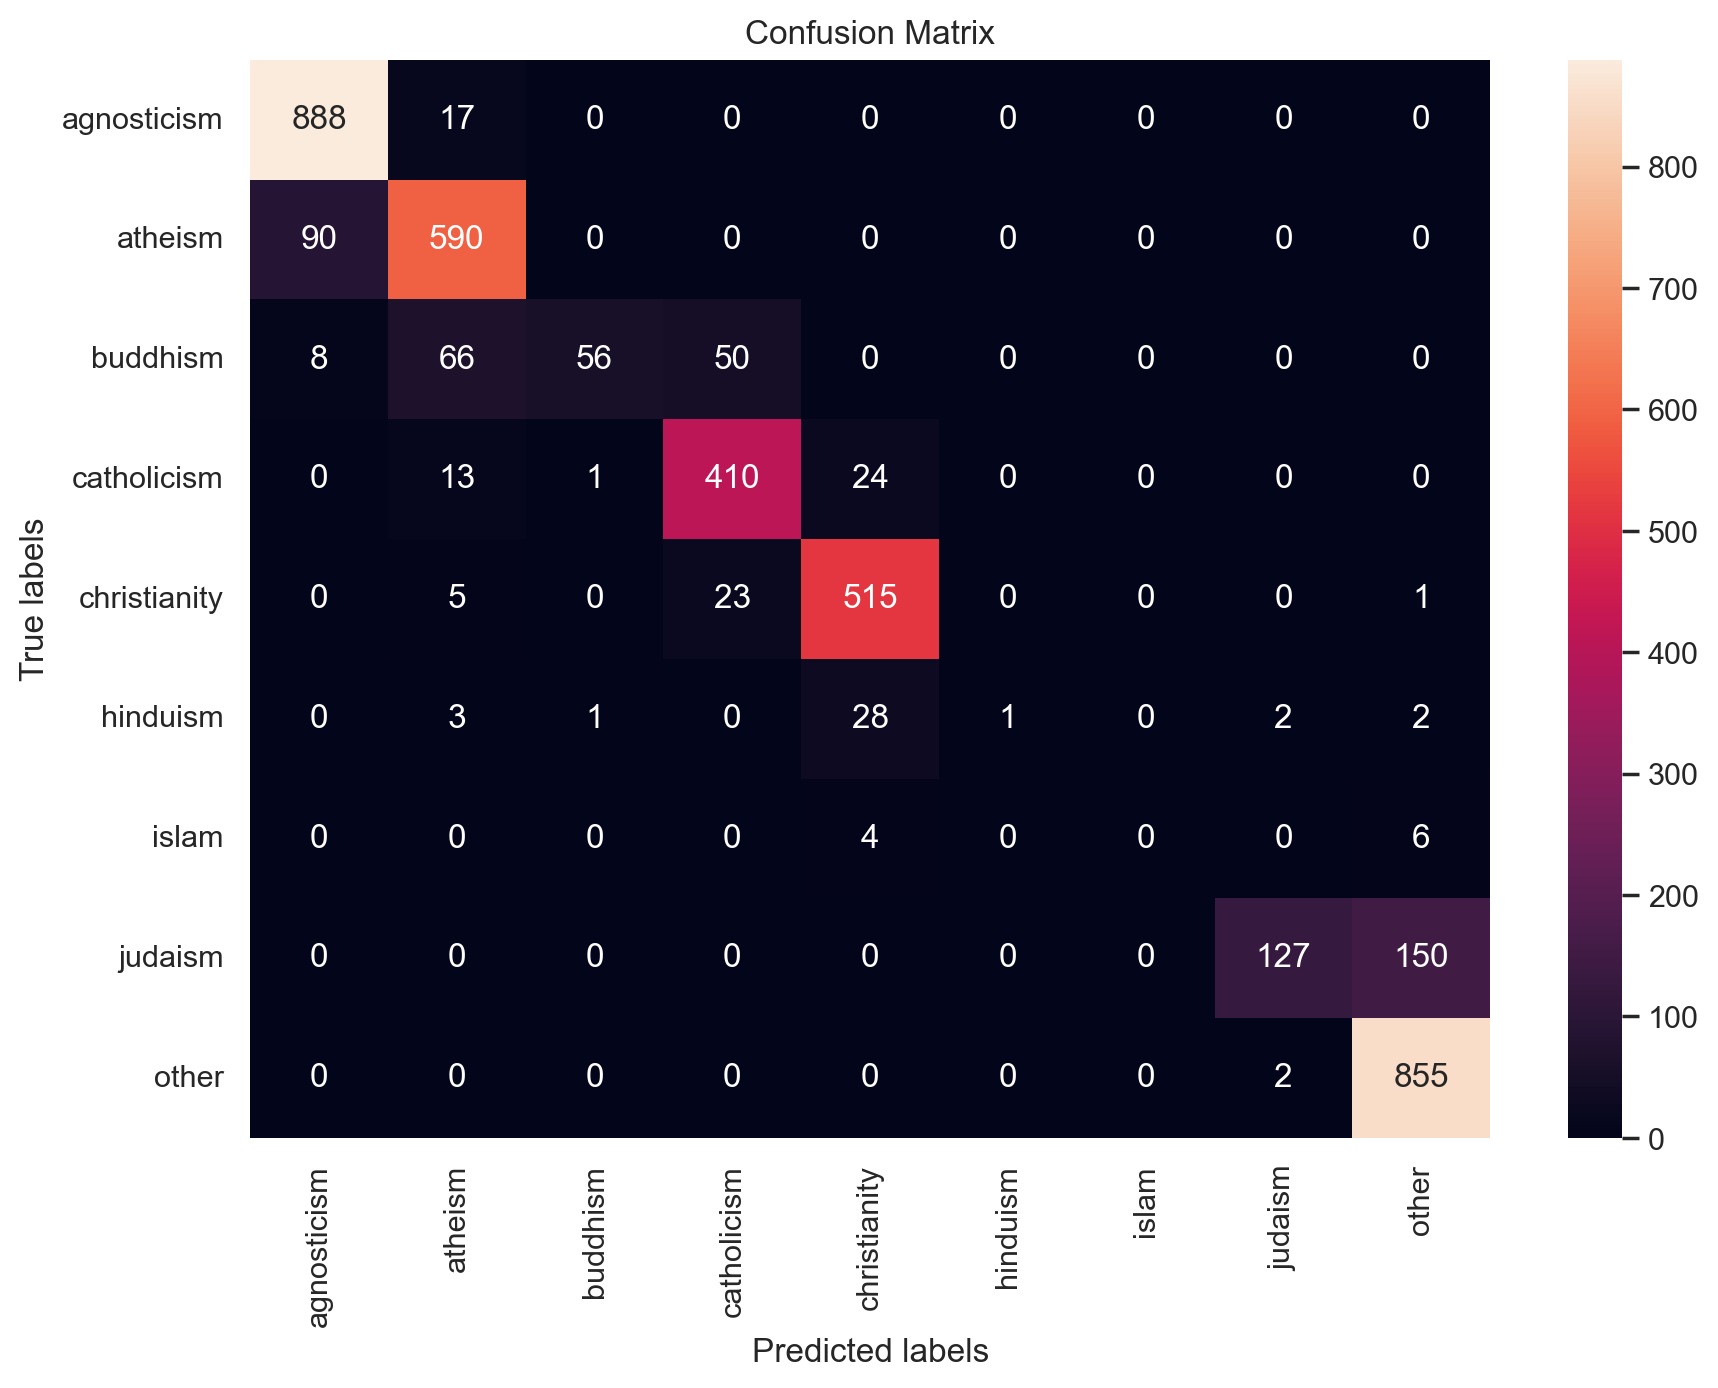

In [145]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
sns.heatmap(cm_knn, annot=True, ax=ax, fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(['agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity', 'hinduism', 'islam', 'judaism', 'other']) 
ax.yaxis.set_ticklabels(['agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity', 'hinduism', 'islam', 'judaism', 'other'])

plt.show()

In this case, the KNN classifier achieved high accuracy for most classes, with some misclassifications occurringin classes with fewer observations.

## Conclusion

In this project, I analyzed a dataset from OKCupid, an app that uses multiple choice and short answers to match users. I started by cleaning and exploring the data, then performed various visualizations and statistical analyses to answer our research questions.

Through this process, we learned several interesting things about the dataset and the app's user base. For example, we found that users tend to be in their 25s and 35s, but men were more than women. We also discovered that users tend to be highly educated and have different religion confesions.

Overall, there were a few surprises and nuances that we may not have predicted without looking at the data in more detail.

In addition to the exploratory data analysis, machine learning models were also built to predict the religion of the users. The Random Forest Classifier and K-Nearest Neighbors algorithms were utilized, and both models achieved high accuracy in predicting the religion of users based on their profiles. This suggests that there may be clear patterns and indicators of religion among OKCupid users, which can be useful for further research and analysis.

### Next steps

Based on the findings of this project, the next steps could include developing a new model for predicting a different variable of interest using machine learning techniques. Additionally, it could be interesting to explore different statistical tests to gain further insights into the relationships between variables in the dataset. These steps could provide a more comprehensive understanding of the factors that influence user behavior on the OKCupid app and could inform future app development and marketing strategies.